# Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

In this competition, your goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

We are going to follow the process called CRISP-DM.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/CRISP-DM_Process_Diagram.png/639px-CRISP-DM_Process_Diagram.png" style="height: 400px; width:400px;"/>

After Business and Data Understanding via EDA, we want to prepare data for modelling. Then evaluate and submit our predictions.

## Step 1: Reading and Understanding the Data

###   Importing Necessary Libraries

In [81]:
#Data Structures
import pandas as pd
import numpy as np
import re
import os
import xgboost as xgb


### For installing missingno library, type this command in terminal
#pip install missingno

import missingno as msno
pd.set_option('display.max_columns', None)

#Sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE

from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

from sklearn.metrics import confusion_matrix, precision_score, recall_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.neighbors import LocalOutlierFactor


from sklearn import tree
import graphviz 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.metrics import plot_roc_curve
from sklearn import metrics
from sklearn.metrics import confusion_matrix



#Others
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [82]:
data = pd.read_csv("train.csv")
unseen = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv")
data_dict = pd.read_csv("data_dictionary.csv")

print(data.shape)
print(unseen.shape)
print(sample.shape)
print(data_dict.shape)

(69999, 172)
(30000, 171)
(30000, 2)
(36, 2)


In [83]:
data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [84]:
data = data.set_index('id')

In [85]:
data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 69998
Data columns (total 171 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    circle_id                 69999 non-null  int64  
 1    loc_og_t2o_mou            69297 non-null  float64
 2    std_og_t2o_mou            69297 non-null  float64
 3    loc_ic_t2o_mou            69297 non-null  float64
 4    last_date_of_month_6      69999 non-null  object 
 5    last_date_of_month_7      69600 non-null  object 
 6    last_date_of_month_8      69266 non-null  object 
 7    arpu_6                    69999 non-null  float64
 8    arpu_7                    69999 non-null  float64
 9    arpu_8                    69999 non-null  float64
 10   onnet_mou_6               67231 non-null  float64
 11   onnet_mou_7               67312 non-null  float64
 12   onnet_mou_8               66296 non-null  float64
 13   offnet_mou_6              67231 non-null  fl

# Step 2: Create X, y and then Train test split


### Remove Constant Columns

In [86]:
constant_columns = [col for col in data.columns if len(data[col].unique()) <=2] # to see even blank values in the constant columns
                                                                                #otherwise it should be equal to 1

In [87]:
print(constant_columns)

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'churn_probability']


In [88]:
data['circle_id'].unique()

array([109], dtype=int64)

In [89]:
data['loc_og_t2o_mou'].unique()

array([ 0., nan])

In [90]:
data['std_og_t2o_mou'].unique()

array([ 0., nan])

In [91]:
data['loc_ic_t2o_mou'].unique()

array([ 0., nan])

In [92]:
data['last_date_of_month_6'].unique()

array(['6/30/2014'], dtype=object)

In [93]:
data['last_date_of_month_7'].unique()

array(['7/31/2014', nan], dtype=object)

In [94]:
data['last_date_of_month_8'].unique()

array(['8/31/2014', nan], dtype=object)

In [95]:
data['std_og_t2c_mou_6'].unique()

array([ 0., nan])

In [96]:
data['std_og_t2c_mou_7'].unique()

array([ 0., nan])

In [97]:
data['std_og_t2c_mou_8'].unique()

array([ 0., nan])

In [98]:
data['std_ic_t2o_mou_6'].unique()

array([ 0., nan])

In [99]:
data['std_ic_t2o_mou_7'].unique()

array([ 0., nan])

In [100]:
data['std_ic_t2o_mou_8'].unique()

array([ 0., nan])

In [101]:
to_drop =['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']

In [102]:
X = data.drop(to_drop,1).iloc[:,:-1]
y = data.iloc[:,-1]

X.shape, y.shape

((69999, 157), (69999,))

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=100)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((55999, 157), (14000, 157), (55999,), (14000,))

In [104]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
15446,4176.128,3287.954,4269.998,40.83,2.03,21.03,205.71,61.31,54.89,0.00,0.0,0.00,0.00,0.00,0.00,36.68,1.63,12.31,49.64,2.29,8.21,5.28,2.88,4.43,0.0,0.0,0.0,91.61,6.81,24.96,3.99,0.00,5.41,0.00,0.00,0.00,0.0,0.0,0.0,3.99,0.00,5.41,150.93,56.53,45.54,0.00,0.00,0.00,0.00,0.0,0.0,246.54,63.34,75.93,53.04,3.36,28.81,51.73,6.06,13.71,11.69,3.88,13.21,116.48,13.31,55.74,28.76,15.88,18.48,0.00,0.00,0.00,0.0,0.0,0.0,28.76,15.88,18.48,162.14,60.89,79.36,0.00,0.0,0.0,14.86,26.89,4.43,2.03,4.79,0.7,6,6,5,5150,3630,4100,2100,1580,1050,6/27/2014,7/31/2014,8/25/2014,0,1000,1050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,264,165.69,449.15,471.42
42512,112.714,9.882,0.000,91.26,12.75,NaN,31.36,0.00,NaN,121.16,0.0,NaN,122.63,12.75,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.0,0.0,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.0,0.0,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.0,NaN,0.00,0.00,0.00,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.0,0.0,NaN,0.00,0.00,NaN,0.00,0.00,0.00,0.00,0.0,NaN,0.00,0.00,NaN,0.00,0.00,NaN,5,5,4,132,30,0,44,30,0,6/18/2014,7/23/2014,8/28/2014,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1971,0.00,0.00,0.00
39967,167.890,167.848,193.302,0.00,0.00,0.71,0.00,0.00,2.16,0.00,0.0,7.

In [105]:
X_train.shape

(55999, 157)

### Missing Value Analysis

In [106]:
pd. set_option("display.max_rows", None)
missing_data_percent = 100*X_train.isnull().sum()/(X_train.shape[0])
missing_data_percent[missing_data_percent>0]

onnet_mou_6                  3.878641
onnet_mou_7                  3.821497
onnet_mou_8                  5.319738
offnet_mou_6                 3.878641
offnet_mou_7                 3.821497
offnet_mou_8                 5.319738
roam_ic_mou_6                3.878641
roam_ic_mou_7                3.821497
roam_ic_mou_8                5.319738
roam_og_mou_6                3.878641
roam_og_mou_7                3.821497
roam_og_mou_8                5.319738
loc_og_t2t_mou_6             3.878641
loc_og_t2t_mou_7             3.821497
loc_og_t2t_mou_8             5.319738
loc_og_t2m_mou_6             3.878641
loc_og_t2m_mou_7             3.821497
loc_og_t2m_mou_8             5.319738
loc_og_t2f_mou_6             3.878641
loc_og_t2f_mou_7             3.821497
loc_og_t2f_mou_8             5.319738
loc_og_t2c_mou_6             3.878641
loc_og_t2c_mou_7             3.821497
loc_og_t2c_mou_8             5.319738
loc_og_mou_6                 3.878641
loc_og_mou_7                 3.821497
loc_og_mou_8

In [107]:
#Columns with missing percentage greater than 40%
cols_miss_grtr_40 = list(missing_data_percent[missing_data_percent>40].index)
print(cols_miss_grtr_40)

['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']


In [108]:
X_train = X_train.drop(cols_miss_grtr_40,axis=1)

In [109]:
X_train.shape

(55999, 127)

In [110]:
print(100*X_train.isnull().sum()/(X_train.shape[0]))

arpu_6                 0.000000
arpu_7                 0.000000
arpu_8                 0.000000
onnet_mou_6            3.878641
onnet_mou_7            3.821497
onnet_mou_8            5.319738
offnet_mou_6           3.878641
offnet_mou_7           3.821497
offnet_mou_8           5.319738
roam_ic_mou_6          3.878641
roam_ic_mou_7          3.821497
roam_ic_mou_8          5.319738
roam_og_mou_6          3.878641
roam_og_mou_7          3.821497
roam_og_mou_8          5.319738
loc_og_t2t_mou_6       3.878641
loc_og_t2t_mou_7       3.821497
loc_og_t2t_mou_8       5.319738
loc_og_t2m_mou_6       3.878641
loc_og_t2m_mou_7       3.821497
loc_og_t2m_mou_8       5.319738
loc_og_t2f_mou_6       3.878641
loc_og_t2f_mou_7       3.821497
loc_og_t2f_mou_8       5.319738
loc_og_t2c_mou_6       3.878641
loc_og_t2c_mou_7       3.821497
loc_og_t2c_mou_8       5.319738
loc_og_mou_6           3.878641
loc_og_mou_7           3.821497
loc_og_mou_8           5.319738
std_og_t2t_mou_6       3.878641
std_og_t

In [111]:
missing_data_percent = 100*X_train.isnull().sum()/(X_train.shape[0])
impute_cols = list(missing_data_percent[missing_data_percent.gt(0)].index)

print(impute_cols)

['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic

In [112]:
impute_cols_non_numeric = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']

In [113]:
impute_cols_numeric = [x for x in impute_cols if x not in impute_cols_non_numeric]
print(impute_cols_numeric)

['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic

### Impute Missing Values

In [114]:

imp = SimpleImputer(strategy='median') 
                                       
X_train[impute_cols_numeric] = imp.fit_transform(X_train[impute_cols_numeric])

'''these are continous numerical columns not discrete columns,
 we can also impute by using box plots ''' 


'these are continous numerical columns not discrete columns,\n we can also impute by using box plots '

In [115]:
imp_2 = SimpleImputer(strategy='most_frequent')
X_train[impute_cols_non_numeric] = imp_2.fit_transform(X_train[impute_cols_non_numeric])

In [116]:
#Columns with missing percentage greater than 0%
missing_data_percent = 100*X_train.isnull().sum()/(X_train.shape[0])
missing_data_percent[missing_data_percent>0]

Series([], dtype: float64)

In [117]:
X_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55999 entries, 15446 to 45925
Data columns (total 127 columns):
 #    Column               Dtype  
---   ------               -----  
 0    arpu_6               float64
 1    arpu_7               float64
 2    arpu_8               float64
 3    onnet_mou_6          float64
 4    onnet_mou_7          float64
 5    onnet_mou_8          float64
 6    offnet_mou_6         float64
 7    offnet_mou_7         float64
 8    offnet_mou_8         float64
 9    roam_ic_mou_6        float64
 10   roam_ic_mou_7        float64
 11   roam_ic_mou_8        float64
 12   roam_og_mou_6        float64
 13   roam_og_mou_7        float64
 14   roam_og_mou_8        float64
 15   loc_og_t2t_mou_6     float64
 16   loc_og_t2t_mou_7     float64
 17   loc_og_t2t_mou_8     float64
 18   loc_og_t2m_mou_6     float64
 19   loc_og_t2m_mou_7     float64
 20   loc_og_t2m_mou_8     float64
 21   loc_og_t2f_mou_6     float64
 22   loc_og_t2f_mou_7     float64
 23   loc_o

In [118]:
X_train.drop(impute_cols_non_numeric,axis=1,inplace=True)

In [119]:
X_train.shape

(55999, 124)

In [120]:
X_train.to_csv("iteration_1.csv",index=False)

# Step 3: Exploratory Data Analysis & Preprocessing

### Outliers treatment

In [121]:

clf = LocalOutlierFactor(n_neighbors=50, contamination='auto')
X_out = X_train[impute_cols_numeric].values
out_pred = clf.fit_predict(X_out)

In [122]:
print(out_pred)

[-1 -1  1 ...  1  1  1]


In [123]:
print(pd.Series(out_pred).value_counts())

 1    49431
-1     6568
dtype: int64


In [124]:
X_train_out_removed = X_train.loc[out_pred==1,:]
print(X_train_out_removed.shape)

(49431, 124)


In [125]:
y_train=y_train.loc[out_pred==1]

### Feature engineering

In [126]:
superscript =["arpu_","onnet_mou_","offnet_mou_","roam_ic_mou_","roam_og_mou_","loc_og_t2t_mou_","loc_og_t2m_mou_","loc_og_t2f_mou_","loc_og_t2c_mou_",
"loc_og_mou_","std_og_t2t_mou_","std_og_t2m_mou_","std_og_t2f_mou_","std_og_mou_","isd_og_mou_","spl_og_mou_","og_others_","total_og_mou_","loc_ic_t2t_mou_",
"loc_ic_t2m_mou_","loc_ic_t2f_mou_","loc_ic_mou_","std_ic_t2t_mou_","std_ic_t2m_mou_","std_ic_t2f_mou_","std_ic_mou_","total_ic_mou_",
"spl_ic_mou_","isd_ic_mou_","ic_others_","total_rech_num_","total_rech_amt_","vol_2g_mb_",
"vol_3g_mb_","monthly_2g_","sachet_2g_","monthly_3g_","sachet_3g_"]

list_of_superscript_cols =[]
for i in range(len(superscript)):
    cols = list(X_train_out_removed.columns[X_train_out_removed.columns.str.startswith(superscript[i])])
    list_of_superscript_cols.append(cols)
    
print(list_of_superscript_cols )

for i in range(len(superscript)):
    X_train_out_removed[superscript[i]+"sum"]=X_train_out_removed[list_of_superscript_cols[i]].sum(axis=1)
print(X_train_out_removed.shape)
    

[['arpu_6', 'arpu_7', 'arpu_8'], ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8'], ['offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'], ['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8'], ['roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8'], ['loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8'], ['loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8'], ['loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8'], ['loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8'], ['loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8'], ['std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8'], ['std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8'], ['std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8'], ['std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8'], ['isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8'], ['spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8'], ['og_others_6', 'og_others_7', 'og_others_8'], ['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8'], ['loc_ic_t2t_mou_6', 'loc_i

In [127]:
X_train_out_removed['vbc_3g_sum'] = X_train_out_removed[['aug_vbc_3g','jul_vbc_3g','jun_vbc_3g']].sum(axis=1)

In [128]:
print(X_train_out_removed.shape)

(49431, 163)


In [129]:
imp_sum_cols =  list(X_train_out_removed.columns[X_train_out_removed.columns.str.endswith("_sum")])
print(imp_sum_cols)

['arpu_sum', 'onnet_mou_sum', 'offnet_mou_sum', 'roam_ic_mou_sum', 'roam_og_mou_sum', 'loc_og_t2t_mou_sum', 'loc_og_t2m_mou_sum', 'loc_og_t2f_mou_sum', 'loc_og_t2c_mou_sum', 'loc_og_mou_sum', 'std_og_t2t_mou_sum', 'std_og_t2m_mou_sum', 'std_og_t2f_mou_sum', 'std_og_mou_sum', 'isd_og_mou_sum', 'spl_og_mou_sum', 'og_others_sum', 'total_og_mou_sum', 'loc_ic_t2t_mou_sum', 'loc_ic_t2m_mou_sum', 'loc_ic_t2f_mou_sum', 'loc_ic_mou_sum', 'std_ic_t2t_mou_sum', 'std_ic_t2m_mou_sum', 'std_ic_t2f_mou_sum', 'std_ic_mou_sum', 'total_ic_mou_sum', 'spl_ic_mou_sum', 'isd_ic_mou_sum', 'ic_others_sum', 'total_rech_num_sum', 'total_rech_amt_sum', 'vol_2g_mb_sum', 'vol_3g_mb_sum', 'monthly_2g_sum', 'sachet_2g_sum', 'monthly_3g_sum', 'sachet_3g_sum', 'vbc_3g_sum']


### Data Visualization

In [130]:
eda_data=X_train_out_removed.copy()

eda_cols = list(eda_data.select_dtypes(include='number').columns)
eda_data['target'] = y_train.values

eda_data_1 = eda_data[eda_data['target']==0]
eda_data_0 = eda_data[eda_data['target']==1]

In [131]:

# plt.figure(figsize=(22,100))
# for i in (enumerate(eda_cols)): ## i is tuple which has key and column name pairs
#     plt.subplot(len(eda_cols)//3+3,3,i[0]+1)
#     sns.distplot(eda_data_1[i[1]].dropna(), color="r", hist=False, kde_kws={"lw": 3},label='Churn=1')
#     sns.distplot(eda_data_0[i[1]].dropna(), color="green", hist=False, kde_kws={"lw": 3},label='Churn=0')
# plt.legend()
# plt.show()   

In [132]:
# 1,2,1000, 10002
# 1,2,1,  4

In [133]:
# X_train_out_removed.corr()
# plt.figure(figsize=(16, 10))
# mask = np.triu(np.ones_like(X_train_out_removed.corr(), dtype=np.bool))
# sns.heatmap(round(X_train_out_removed.corr(), 1), annot=True,mask=mask)
# plt.show()

In [134]:
import numpy as np

# Create correlation matrix
corr_matrix = X_train_out_removed.corr().abs() #creates 160*160 matrix by coverting -ve correlations to +ve values
#print(corr_matrix)
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

print(to_drop)
# Drop features 
#df.drop(to_drop, axis=1, inplace=True)

['total_ic_mou_6', 'loc_og_t2t_mou_sum', 'loc_og_t2m_mou_sum', 'loc_og_mou_sum', 'loc_ic_t2t_mou_sum', 'loc_ic_mou_sum', 'total_ic_mou_sum', 'total_rech_amt_sum']


In [135]:
high_corrs_to_drop =['loc_og_t2t_mou_sum', 'loc_og_t2m_mou_sum', 'loc_og_mou_sum', 'loc_ic_t2t_mou_sum', 'loc_ic_mou_sum', 'total_ic_mou_sum', 'total_rech_amt_sum']
# we need to drop only sum columns from top correlations as these are the variables which we created on top of existing variables
# that's why we can see that "*_7" variables have high correlations with sum variables

In [136]:
X_train_out_removed.drop(high_corrs_to_drop, axis=1, inplace=True)

In [137]:
X_train_out_removed.shape

(49431, 156)

In [138]:
X_train_out_removed.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,arpu_sum,onnet_mou_sum,offnet_mou_sum,roam_ic_mou_sum,roam_og_mou_sum,loc_og_t2f_mou_sum,loc_og_t2c_mou_sum,std_og_t2t_mou_sum,std_og_t2m_mou_sum,std_og_t2f_mou_sum,std_og_mou_sum,isd_og_mou_sum,spl_og_mou_sum,og_others_sum,total_og_mou_sum,loc_ic_t2m_mou_sum,loc_ic_t2f_mou_sum,std_ic_t2t_mou_sum,std_ic_t2m_mou_sum,std_ic_t2f_mou_sum,std_ic_mou_sum,spl_ic_mou_sum,isd_ic_mou_sum,ic_others_sum,total_rech_num_sum,vol_2g_mb_sum,vol_3g_mb_sum,monthly_2g_sum,sachet_2g_sum,monthly_3g_sum,sachet_3g_sum,vbc_3g_sum
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
39967,167.890,167.848,193.302,0.00,0.00,0.71,0.00,0.00,2.16,0.0,0.0,7.98,0.0,0.0,2.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,26.49,62.71,28.29,3.94,3.93,0.00,5.29,3.78,18.04,35.74,70.43,46.34,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,35.91,70.43,46.34,0.16,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6,5,3,198,198,248,198,198,198,0,0,50,149.38,34.68,12.65,643.89,397.92,589.94,1,1,1,0,0,0,0,0,0,0,0,0,250,21.13,154.12,681.55,529.040,0.71,2.16,7.98,2.88,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,7.87,27.11,0.00,0.00,0.0,0.00,0.16,0.00,0.00,14,196.71,1631.75,3,0,0,0,856.80
54093,104.107,151.487,133.804,18.51,29.43,35.68,82.36,108.81,78.76,0.0,0.0,0.00,0.0,0.0,0.00,0.43,5.81,5.28,82.36,108.81,59.19,0.00,0.00,19.49,0.00,0.00,0.0,82.79,114.63,83.98,18.08,23.61,30.39,0.00,0.00,0.00,0.0,0.0,0.0,18.08,23.61,30.39,0.0,0.0,0.0,0.00,0.00,0.06,0.00,0.0,0.0,100.88,138.24,114.44,7.39,81.91,17.38,18.91,105.81,109.69,0.00,0.00,0.00,26.31,187.73,127.08,0.00,14.58,5.83,0.00,0.00,0.00,0.0,0.0,0.0,0.00,14.58,5.83,26.31,202.31,132.91,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3,4,4,130,150,160,50,50,50,30,50,50,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,649,0.00,0.00,0.00,389.398,83.62,269.93,0.00,0.00,19.49,0.00,72.08,0.00,0.0,72.08,0.0,0.06,0.00,353.56,234.41,0.00,20.41,0.00,0.0,20.41,0.00,0.00,0.00,11,0.00,0.00,0,0,0,0,0.00
31379,490.799,840.898,849.796,67.68,232.48,351.78,

### Feature Scaling

In [139]:

pt = PowerTransformer(method='yeo-johnson', standardize=True,) 


In [140]:
scale_num_cols= list(X_train_out_removed.columns)
X_train_out_removed[scale_num_cols] = pt.fit_transform(X_train_out_removed[scale_num_cols])

In [141]:
X_train_out_removed.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,arpu_sum,onnet_mou_sum,offnet_mou_sum,roam_ic_mou_sum,roam_og_mou_sum,loc_og_t2f_mou_sum,loc_og_t2c_mou_sum,std_og_t2t_mou_sum,std_og_t2m_mou_sum,std_og_t2f_mou_sum,std_og_mou_sum,isd_og_mou_sum,spl_og_mou_sum,og_others_sum,total_og_mou_sum,loc_ic_t2m_mou_sum,loc_ic_t2f_mou_sum,std_ic_t2t_mou_sum,std_ic_t2m_mou_sum,std_ic_t2f_mou_sum,std_ic_mou_sum,spl_ic_mou_sum,isd_ic_mou_sum,ic_others_sum,total_rech_num_sum,vol_2g_mb_sum,vol_3g_mb_sum,monthly_2g_sum,sachet_2g_sum,monthly_3g_sum,sachet_3g_sum,vbc_3g_sum
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
39967,-0.286266,-0.316916,-0.165396,-1.780473,-1.755444,-1.493375,-2.199335,-2.179429,-1.756093,-0.462259,-0.389966,2.687492,-0.465426,-0.391461,2.590069,-1.537724,-1.537425,-1.541982,-1.811031,-1.823902,-1.819964,-0.751114,-0.759816,-0.744878,-0.461801,-0.480253,-0.492962,-1.894310,-1.907781,-1.895297,-0.816234,-0.816932,-0.797820,-1.081236,-1.068754,-1.061883,-0.355324,-0.342862,-0.341059,-1.190402,-1.176275,-1.173239,-0.204951,-0.197002,-0.187241,-0.754551,-0.812378,-0.824309,-0.447204,-0.05517,-0.064369,-1.867834,-1.881271,-1.808781,0.376052,0.928399,0.411691,-1.387623,-1.426636,-2.058429,0.779851,0.584937,1.328361,-0.605506,-0.188293,-0.482065,-0.748682,-0.755697,-0.744473,-1.093646,-1.087060,-1.093445,-0.491028,-0.489883,-0.492298,-1.277639,-1.270173,-1.283368,-0.680694,-0.312164,-0.536917,1.925790,-0.344017,-0.364632,-0.390242,-0.408888,-0.399834,-0.501067,-0.466238,-0.495094,0.056959,-0.209179,-0.588713,-0.076662,-0.038325,0.155749,1.063673,1.056060,0.994100,-1.431544,-1.300095,0.505796,2.072052,2.018551,1.892550,2.512106,2.432710,2.392056,3.636022,3.545769,3.608185,-0.377823,-0.384118,-0.398990,-0.240746,-0.23677,-0.246293,-0.205986,-0.203249,-0.205612,-1.528958,2.285899,2.406178,2.494848,-0.120069,-2.133844,-2.735271,1.605229,1.072144,-0.986137,-0.744819,-1.006050,-1.341963,-0.495321,-1.447417,-0.297079,-1.139534,-0.452702,-2.480371,-1.943081,0.876312,-1.004057,-1.444330,-0.688915,-1.684765,1.096908,-0.545484,-0.678372,-0.345896,1.643057,2.010823,2.674397,-0.521575,-0.3209,-0.299260,2.053295
54093,-0.614088,-0.384

In [142]:
X_train_final=X_train_out_removed.copy()

In [143]:
X_train_final.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,arpu_sum,onnet_mou_sum,offnet_mou_sum,roam_ic_mou_sum,roam_og_mou_sum,loc_og_t2f_mou_sum,loc_og_t2c_mou_sum,std_og_t2t_mou_sum,std_og_t2m_mou_sum,std_og_t2f_mou_sum,std_og_mou_sum,isd_og_mou_sum,spl_og_mou_sum,og_others_sum,total_og_mou_sum,loc_ic_t2m_mou_sum,loc_ic_t2f_mou_sum,std_ic_t2t_mou_sum,std_ic_t2m_mou_sum,std_ic_t2f_mou_sum,std_ic_mou_sum,spl_ic_mou_sum,isd_ic_mou_sum,ic_others_sum,total_rech_num_sum,vol_2g_mb_sum,vol_3g_mb_sum,monthly_2g_sum,sachet_2g_sum,monthly_3g_sum,sachet_3g_sum,vbc_3g_sum
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
39967,-0.286266,-0.316916,-0.165396,-1.780473,-1.755444,-1.493375,-2.199335,-2.179429,-1.756093,-0.462259,-0.389966,2.687492,-0.465426,-0.391461,2.590069,-1.537724,-1.537425,-1.541982,-1.811031,-1.823902,-1.819964,-0.751114,-0.759816,-0.744878,-0.461801,-0.480253,-0.492962,-1.894310,-1.907781,-1.895297,-0.816234,-0.816932,-0.797820,-1.081236,-1.068754,-1.061883,-0.355324,-0.342862,-0.341059,-1.190402,-1.176275,-1.173239,-0.204951,-0.197002,-0.187241,-0.754551,-0.812378,-0.824309,-0.447204,-0.05517,-0.064369,-1.867834,-1.881271,-1.808781,0.376052,0.928399,0.411691,-1.387623,-1.426636,-2.058429,0.779851,0.584937,1.328361,-0.605506,-0.188293,-0.482065,-0.748682,-0.755697,-0.744473,-1.093646,-1.087060,-1.093445,-0.491028,-0.489883,-0.492298,-1.277639,-1.270173,-1.283368,-0.680694,-0.312164,-0.536917,1.925790,-0.344017,-0.364632,-0.390242,-0.408888,-0.399834,-0.501067,-0.466238,-0.495094,0.056959,-0.209179,-0.588713,-0.076662,-0.038325,0.155749,1.063673,1.056060,0.994100,-1.431544,-1.300095,0.505796,2.072052,2.018551,1.892550,2.512106,2.432710,2.392056,3.636022,3.545769,3.608185,-0.377823,-0.384118,-0.398990,-0.240746,-0.23677,-0.246293,-0.205986,-0.203249,-0.205612,-1.528958,2.285899,2.406178,2.494848,-0.120069,-2.133844,-2.735271,1.605229,1.072144,-0.986137,-0.744819,-1.006050,-1.341963,-0.495321,-1.447417,-0.297079,-1.139534,-0.452702,-2.480371,-1.943081,0.876312,-1.004057,-1.444330,-0.688915,-1.684765,1.096908,-0.545484,-0.678372,-0.345896,1.643057,2.010823,2.674397,-0.521575,-0.3209,-0.299260,2.053295
54093,-0.614088,-0.384

In [144]:
y_train.head()

id
39967    0
54093    0
31379    0
50297    0
14563    0
Name: churn_probability, dtype: int64

### Class imbalance

In [145]:
y_train_rows = y_train.shape[0]
y_train_0 = y_train[y_train==0].shape[0]
y_train_1 = y_train[y_train==1].shape[0]
print("Class 0 proportion : ", round((y_train_0*100/y_train_rows),2)," %")
print("Class 1 proportion : ", round((y_train_1*100/y_train_rows),2)," %")

Class 0 proportion :  90.79  %
Class 1 proportion :  9.21  %


In [146]:
y_test_rows = y_test.shape[0]
y_test_0 = y_test[y_test==0].shape[0]
y_test_1 = y_test[y_test==1].shape[0]
print("Class 0 proportion : ", round((y_test_0*100/y_test_rows),2)," %")
print("Class 1 proportion : ", round((y_test_1*100/y_test_rows),2)," %")

Class 0 proportion :  89.81  %
Class 1 proportion :  10.19  %


## Step 4: Building a Logistic Regression model

### Feature Selection

### Method 1: RFECV

In [147]:
# #Create a logistic regression estimator 

# logreg = LogisticRegression()

# #Use RFECV to pick best features, using Stratified Kfold
# rfecv =   RFECV(logreg, cv=5, scoring='accuracy')


In [148]:

# selector = rfecv.fit(X_train_final, y_train)
# selector.support_

In [149]:
# selector.ranking_

In [150]:
# list(zip(X_train_final.columns,selector.support_,selector.ranking_))

In [151]:
# print("Optimal number of features from RFECV :")
# print(selector.n_features_)

### Method 2: Feature selection  using RFE cross val

In [152]:
# cv_scores =[]
# total_cols = len(X_train_final.columns)

In [153]:
# for features in range(20,101,20):
#     rfe = RFE(logreg, features)
#     scores = cross_val_score(rfe, X_train_final, y_train,cv= 5) # consists of array of 5 values for 5 folds at each iteration
#     cv_scores.append(scores)

In [154]:
# cv_scores

In [155]:
# mean_cv_score =[]
# for score in cv_scores:
#     mean_cv_score.append(score.mean())

In [156]:
# plt.figure(figsize=[12,7])
# plt.plot(np.array(range(20,101,20)),mean_cv_score)

### Method 3: Feature Importance using DecisionTreeClassifier, RandomForestClassifier

In [157]:

# clf = DecisionTreeClassifier()
# clf.fit(X_train_final, y_train)

# feat_imp = pd.Series(clf.feature_importances_, index=X_train_final.columns).sort_values(ascending=False)

# feat_imp.plot.bar(color='steelblue', figsize=(12, 6))

In [158]:
# rand_clf = RandomForestClassifier(n_estimators = 100, max_depth=5)
# rand_clf.fit(X_train_final, y_train)

# rand_feat_imp = pd.Series(rand_clf.feature_importances_, index=X_train_final.columns).sort_values(ascending=False)

# rand_feat_imp.plot.bar(color='steelblue', figsize=(20, 6))

### Final Feature selection for our model

In [159]:
logreg =LogisticRegression()
final_number_features = 20
rfe = RFE(logreg, final_number_features)
rfe.fit(X_train_final, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [160]:
rfe.support_

array([False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False,  True, False,
       False, False,  True, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
        True, False,

In [161]:
final_cols = list(X_train_final.columns[rfe.support_])
print(final_cols)

['arpu_7', 'roam_ic_mou_8', 'roam_og_mou_8', 'std_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_mou_8', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_7', 'max_rech_amt_7', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'aon', 'onnet_mou_sum', 'offnet_mou_sum']


In [162]:
import statsmodels.api as sm

In [163]:
# selecting columns only which are 'True' in rfecv.support_ i.e True columns were selected for creating a model

X_train_col=X_train_final[final_cols]
X_train_1=sm.add_constant(X_train_col)    # Adding constant
X_train_1.shape

(49431, 21)

### Model 1

In [164]:
# creating 1st model after RFE

lr1=sm.GLM(y_train,X_train_1,family=sm.families.Binomial())
reg1=lr1.fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                49431
Model:                            GLM   Df Residuals:                    49410
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7876.7
Date:                Mon, 02 Aug 2021   Deviance:                       15753.
Time:                        20:41:03   Pearson chi2:                 6.52e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.7867      0.038    -98.999      0.000      -3.862      -3.712
arpu_7                 0.2479      0.048      5.197      0.000       0.154       0.341
roam_ic_mou_8          0.2012      0.029      6.832      0.000       0.143       0.259
roam_og_mou_8          0.2828      0.029      9.708      0.000       0.226       0.340
std_og_mou_8           0.3714      0.044      8.407      0.000       0.285       0.458
total_og_mou_6        -0.2355      0.027     -8.716      0.000      -0.288      -0.183
total_og_mou_7        -0.2564      0.045     -5.670      0.000      -0.345      -0.168
total_og_mou_8        -0.5495      0.059     -9.284      0.000      -0.666      -0.434
loc_ic_mou_8           0.5274      0.041     12.924      0.000       0.447       0.607
total_ic_mou_7         0.2780      0.045      6.133      0.000       0.189       0.367
total_ic_mou_8        -1.5289      0.065    -23.631      0.000      -1.656      -1.402
spl_ic_mou_8          -0.4972      0.042    -11.953      0.000      -0.579      -0.416
total_rech_num_8      -0.2347      0.031     -7.513      0.000      -0.296      -0.173
total_rech_amt_7       0.3594      0.069      5.178      0.000       0.223       0.495
max_rech_amt_7        -0.4741      0.045    -10.537      0.000      -0.562      -0.386
last_day_rch_amt_8    -0.5880      0.026    -22.194      0.000      -0.640      -0.536
vol_2g_mb_8           -0.1932      0.039     -4.970      0.000      -0.269      -0.117
vol_3g_mb_8           -0.2866      0.041     -7.040      0.000      -0.366      -0.207
aon                   -0.2998      0.024    -12.278      0.000      -0.348      -0.252
onnet_mou_sum          0.2727      0.032      8.527      0.000       0.210       0.335
offnet_mou_sum         0.3543      0.034     10.317      0.000       0.287       0.422
======================================================================================
"""

In [165]:
vif = pd.DataFrame()
X= X_train_col
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 

,Features,VIF
12,total_rech_amt_7,9.99
9,total_ic_mou_8,9.70
6,total_og_mou_8,6.83
5,total_og_mou_7,6.56
8,total_ic_mou_7,5.54
7,loc_ic_mou_8,5.07
1,roam_ic_mou_8,4.92
2,roam_og_mou_8,4.92
13,max_rech_amt_7,4.54
0,arpu_7,3.57


In [166]:
#COLUMN total_rech_amt_7 HAS A VERY HIGH VIF SO WE NEED TO DROP IT
X_train_2=X_train_col.drop(['total_rech_amt_7'],axis=1)

### Model 2

In [167]:
# creating 2nd model after RFE

lr2=sm.GLM(y_train,sm.add_constant(X_train_2),family=sm.families.Binomial())
reg2=lr2.fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                49431
Model:                            GLM   Df Residuals:                    49411
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7890.5
Date:                Mon, 02 Aug 2021   Deviance:                       15781.
Time:                        20:41:05   Pearson chi2:                 6.35e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.7823      0.038    -98.957      0.000      -3.857      -3.707
arpu_7                 0.3903      0.037     10.560      0.000       0.318       0.463
roam_ic_mou_8          0.1962      0.029      6.683      0.000       0.139       0.254
roam_og_mou_8          0.2853      0.029      9.819      0.000       0.228       0.342
std_og_mou_8           0.3759      0.044      8.520      0.000       0.289       0.462
total_og_mou_6        -0.2436      0.027     -9.035      0.000      -0.296      -0.191
total_og_mou_7        -0.1855      0.043     -4.317      0.000      -0.270      -0.101
total_og_mou_8        -0.5793      0.059     -9.840      0.000      -0.695      -0.464
loc_ic_mou_8           0.5267      0.041     12.922      0.000       0.447       0.607
total_ic_mou_7         0.2919      0.045      6.452      0.000       0.203       0.381
total_ic_mou_8        -1.5362      0.065    -23.756      0.000      -1.663      -1.409
spl_ic_mou_8          -0.5010      0.042    -12.037      0.000      -0.583      -0.419
total_rech_num_8      -0.1782      0.029     -6.069      0.000      -0.236      -0.121
max_rech_amt_7        -0.2824      0.026    -11.001      0.000      -0.333      -0.232
last_day_rch_amt_8    -0.5790      0.026    -22.074      0.000      -0.630      -0.528
vol_2g_mb_8           -0.1862      0.039     -4.794      0.000      -0.262      -0.110
vol_3g_mb_8           -0.3018      0.041     -7.418      0.000      -0.381      -0.222
aon                   -0.3106      0.024    -12.790      0.000      -0.358      -0.263
onnet_mou_sum          0.2801      0.032      8.763      0.000       0.217       0.343
offnet_mou_sum         0.3588      0.034     10.446      0.000       0.291       0.426
======================================================================================
"""

In [168]:
vif = pd.DataFrame()
X= X_train_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 

,Features,VIF
9,total_ic_mou_8,9.65
6,total_og_mou_8,6.70
5,total_og_mou_7,5.91
8,total_ic_mou_7,5.53
7,loc_ic_mou_8,5.06
2,roam_og_mou_8,4.92
1,roam_ic_mou_8,4.92
18,offnet_mou_sum,3.07
0,arpu_7,2.51
17,onnet_mou_sum,2.50


In [169]:
#COLUMN total_ic_mou_8 HAS A VERY HIGH VIF SO WE NEED TO DROP IT
X_train_3=X_train_2.drop(['total_ic_mou_8'],axis=1)

### Model 3

In [170]:
# creating 3rd model after RFE

lr3=sm.GLM(y_train,sm.add_constant(X_train_3),family=sm.families.Binomial())
reg3=lr3.fit()
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                49431
Model:                            GLM   Df Residuals:                    49412
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8209.1
Date:                Mon, 02 Aug 2021   Deviance:                       16418.
Time:                        20:41:08   Pearson chi2:                 7.11e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.8172      0.039    -97.364      0.000      -3.894      -3.740
arpu_7                 0.4125      0.037     11.218      0.000       0.340       0.485
roam_ic_mou_8          0.1421      0.029      4.865      0.000       0.085       0.199
roam_og_mou_8          0.2397      0.029      8.263      0.000       0.183       0.297
std_og_mou_8           0.8448      0.042     20.105      0.000       0.762       0.927
total_og_mou_6        -0.2858      0.026    -10.808      0.000      -0.338      -0.234
total_og_mou_7         0.0195      0.041      0.478      0.633      -0.060       0.099
total_og_mou_8        -1.7123      0.040    -42.478      0.000      -1.791      -1.633
loc_ic_mou_8          -0.0322      0.032     -1.013      0.311      -0.094       0.030
total_ic_mou_7        -0.2411      0.037     -6.527      0.000      -0.313      -0.169
spl_ic_mou_8          -0.5784      0.042    -13.904      0.000      -0.660      -0.497
total_rech_num_8      -0.1794      0.028     -6.299      0.000      -0.235      -0.124
max_rech_amt_7        -0.2808      0.025    -11.175      0.000      -0.330      -0.232
last_day_rch_amt_8    -0.5954      0.026    -22.849      0.000      -0.646      -0.544
vol_2g_mb_8           -0.2244      0.038     -5.835      0.000      -0.300      -0.149
vol_3g_mb_8           -0.2830      0.040     -7.064      0.000      -0.362      -0.204
aon                   -0.3068      0.024    -13.041      0.000      -0.353      -0.261
onnet_mou_sum          0.4007      0.031     12.755      0.000       0.339       0.462
offnet_mou_sum         0.5157      0.034     15.219      0.000       0.449       0.582
======================================================================================
"""

In [171]:
vif = pd.DataFrame()
X= X_train_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,total_og_mou_7,5.65
2,roam_og_mou_8,4.91
1,roam_ic_mou_8,4.91
6,total_og_mou_8,4.64
8,total_ic_mou_7,3.65
7,loc_ic_mou_8,3.07
17,offnet_mou_sum,2.95
0,arpu_7,2.51
16,onnet_mou_sum,2.40
4,total_og_mou_6,2.37


In [172]:
#COLUMN total_og_mou_7 HAS A VERY HIGH VIF-VALUE SO WE NEED TO DROP IT
X_train_4=X_train_3.drop(['total_og_mou_7'],axis=1)

### Model 4

In [173]:
# creating 4th model after RFE

lr4=sm.GLM(y_train,sm.add_constant(X_train_4),family=sm.families.Binomial())
reg4=lr4.fit()
reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                49431
Model:                            GLM   Df Residuals:                    49413
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8209.2
Date:                Mon, 02 Aug 2021   Deviance:                       16418.
Time:                        20:41:11   Pearson chi2:                 7.12e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.8175      0.039    -97.366      0.000      -3.894      -3.741
arpu_7                 0.4178      0.035     11.924      0.000       0.349       0.486
roam_ic_mou_8          0.1407      0.029      4.842      0.000       0.084       0.198
roam_og_mou_8          0.2394      0.029      8.255      0.000       0.183       0.296
std_og_mou_8           0.8469      0.042     20.264      0.000       0.765       0.929
total_og_mou_6        -0.2844      0.026    -10.821      0.000      -0.336      -0.233
total_og_mou_8        -1.7096      0.040    -42.843      0.000      -1.788      -1.631
loc_ic_mou_8          -0.0379      0.029     -1.291      0.197      -0.095       0.020
total_ic_mou_7        -0.2303      0.029     -7.881      0.000      -0.288      -0.173
spl_ic_mou_8          -0.5785      0.042    -13.906      0.000      -0.660      -0.497
total_rech_num_8      -0.1787      0.028     -6.284      0.000      -0.234      -0.123
max_rech_amt_7        -0.2787      0.025    -11.263      0.000      -0.327      -0.230
last_day_rch_amt_8    -0.5969      0.026    -23.084      0.000      -0.648      -0.546
vol_2g_mb_8           -0.2252      0.038     -5.861      0.000      -0.301      -0.150
vol_3g_mb_8           -0.2847      0.040     -7.135      0.000      -0.363      -0.207
aon                   -0.3075      0.023    -13.091      0.000      -0.354      -0.261
onnet_mou_sum          0.4042      0.031     13.228      0.000       0.344       0.464
offnet_mou_sum         0.5194      0.033     15.737      0.000       0.455       0.584
======================================================================================
"""

In [174]:
vif = pd.DataFrame()
X= X_train_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 

,Features,VIF
2,roam_og_mou_8,4.91
1,roam_ic_mou_8,4.89
5,total_og_mou_8,4.23
16,offnet_mou_sum,2.72
7,total_ic_mou_7,2.70
6,loc_ic_mou_8,2.57
4,total_og_mou_6,2.32
0,arpu_7,2.28
3,std_og_mou_8,2.22
15,onnet_mou_sum,2.22


In [175]:
#COLUMN roam_og_mou_8 HAS A VERY HIGH VIF-VALUE SO WE NEED TO DROP IT
X_train_5=X_train_4.drop(['roam_og_mou_8'],axis=1)

### Model 5

In [176]:
# creating 5th model after RFE

lr5=sm.GLM(y_train,sm.add_constant(X_train_5),family=sm.families.Binomial())
reg5=lr5.fit()
reg5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                49431
Model:                            GLM   Df Residuals:                    49414
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8243.0
Date:                Mon, 02 Aug 2021   Deviance:                       16486.
Time:                        20:41:15   Pearson chi2:                 7.17e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.8027      0.039    -97.529      0.000      -3.879      -3.726
arpu_7                 0.4237      0.035     12.128      0.000       0.355       0.492
roam_ic_mou_8          0.3331      0.017     19.309      0.000       0.299       0.367
std_og_mou_8           0.8519      0.042     20.441      0.000       0.770       0.934
total_og_mou_6        -0.2930      0.026    -11.187      0.000      -0.344      -0.242
total_og_mou_8        -1.7075      0.040    -42.872      0.000      -1.786      -1.629
loc_ic_mou_8          -0.0653      0.029     -2.244      0.025      -0.122      -0.008
total_ic_mou_7        -0.2299      0.029     -7.866      0.000      -0.287      -0.173
spl_ic_mou_8          -0.5844      0.042    -14.070      0.000      -0.666      -0.503
total_rech_num_8      -0.1737      0.028     -6.123      0.000      -0.229      -0.118
max_rech_amt_7        -0.2712      0.025    -10.963      0.000      -0.320      -0.223
last_day_rch_amt_8    -0.5898      0.026    -22.852      0.000      -0.640      -0.539
vol_2g_mb_8           -0.2253      0.038     -5.886      0.000      -0.300      -0.150
vol_3g_mb_8           -0.2896      0.040     -7.264      0.000      -0.368      -0.211
aon                   -0.3068      0.023    -13.069      0.000      -0.353      -0.261
onnet_mou_sum          0.4191      0.030     13.769      0.000       0.359       0.479
offnet_mou_sum         0.5263      0.033     15.992      0.000       0.462       0.591
======================================================================================
"""

In [177]:
vif = pd.DataFrame()
X= X_train_5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 

,Features,VIF
4,total_og_mou_8,4.23
15,offnet_mou_sum,2.72
6,total_ic_mou_7,2.70
5,loc_ic_mou_8,2.56
3,total_og_mou_6,2.32
0,arpu_7,2.28
2,std_og_mou_8,2.21
14,onnet_mou_sum,2.21
11,vol_2g_mb_8,1.99
8,total_rech_num_8,1.92


In [178]:
#COLUMN total_og_mou_8 HAS A VERY HIGH VIF-VALUE SO WE NEED TO DROP IT
X_train_6=X_train_5.drop(['total_og_mou_8'],axis=1)

### Model 6


In [179]:
# creating 6th model after RFE

lr6=sm.GLM(y_train,sm.add_constant(X_train_6),family=sm.families.Binomial())
reg6=lr6.fit()
reg6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                49431
Model:                            GLM   Df Residuals:                    49415
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9392.9
Date:                Mon, 02 Aug 2021   Deviance:                       18786.
Time:                        20:41:18   Pearson chi2:                 6.23e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.5869      0.034   -104.894      0.000      -3.654      -3.520
arpu_7                 0.4027      0.031     12.841      0.000       0.341       0.464
roam_ic_mou_8          0.3949      0.016     24.189      0.000       0.363       0.427
std_og_mou_8          -0.1689      0.027     -6.233      0.000      -0.222      -0.116
total_og_mou_6        -0.2898      0.024    -12.070      0.000      -0.337      -0.243
loc_ic_mou_8          -0.1380      0.026     -5.213      0.000      -0.190      -0.086
total_ic_mou_7        -0.6193      0.027    -22.566      0.000      -0.673      -0.566
spl_ic_mou_8          -0.6799      0.042    -16.290      0.000      -0.762      -0.598
total_rech_num_8      -0.7520      0.024    -31.983      0.000      -0.798      -0.706
max_rech_amt_7        -0.3418      0.022    -15.681      0.000      -0.384      -0.299
last_day_rch_amt_8    -0.8670      0.023    -37.147      0.000      -0.913      -0.821
vol_2g_mb_8           -0.1937      0.039     -4.973      0.000      -0.270      -0.117
vol_3g_mb_8           -0.1677      0.039     -4.298      0.000      -0.244      -0.091
aon                   -0.4531      0.021    -21.143      0.000      -0.495      -0.411
onnet_mou_sum          0.4500      0.028     16.074      0.000       0.395       0.505
offnet_mou_sum         0.4687      0.030     15.527      0.000       0.409       0.528
======================================================================================
"""

In [180]:
vif = pd.DataFrame()
X= X_train_6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 

,Features,VIF
5,total_ic_mou_7,2.69
4,loc_ic_mou_8,2.50
14,offnet_mou_sum,2.48
3,total_og_mou_6,2.32
0,arpu_7,2.27
13,onnet_mou_sum,2.06
10,vol_2g_mb_8,1.98
11,vol_3g_mb_8,1.91
2,std_og_mou_8,1.86
8,max_rech_amt_7,1.64


## Step 5: Model Performance on train data

In [181]:
# Predicting the train dataset with our final model
y_train_pred=reg6.predict(sm.add_constant(X_train_6))
# Creating a new dataset and saving predicted values in it
y_train_pred_final=pd.DataFrame({'Churn':y_train.values,'Churn_Prob':y_train_pred,'ID':y_train.index})
y_train_pred_final.head()   # viewing first 5 rows


,Churn,Churn_Prob,ID
id,,,
39967,0,0.016626,39967
54093,0,0.019295,54093
31379,0,0.006597,31379
50297,0,0.002398,50297
14563,0,0.016077,14563


### Plotting ROC and calculating AUCROC

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [182]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

    return None

In [183]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

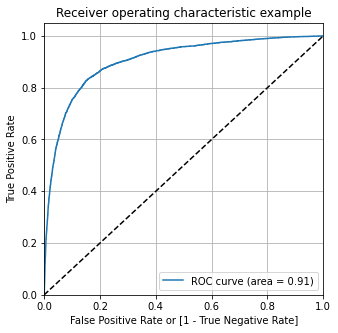

In [184]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

### Finding Optimal Cutoff Point

In [185]:
# creating 10 points out of which one we will choose for our cutoff point

numbers=[float(5*x)/100 for x in range(20)]  # from 0 to 0.95 with set size 0.05

for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,ID,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95
id,,,,,,,,,,,,,,,,,,,,,,,
39967,0,0.016626,39967,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
54093,0,0.019295,54093,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31379,0,0.006597,31379,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50297,0,0.002398,50297,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14563,0,0.016077,14563,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [186]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [float(5*x)/100 for x in range(20)]  # from 0 to 0.95 with set size 0.05
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.00  0.00  0.092149  1.000000  0.000000
0.05  0.05  0.751876  0.896158  0.737231
0.10  0.10  0.846554  0.828979  0.848338
0.15  0.15  0.881673  0.761142  0.893908
0.20  0.20  0.901883  0.703622  0.922007
0.25  0.25  0.912423  0.641712  0.939901
0.30  0.30  0.919362  0.589023  0.952892
0.35  0.35  0.923024  0.534797  0.962430
0.40  0.40  0.925472  0.483644  0.970318
0.45  0.45  0.926625  0.437322  0.976290
0.50  0.50  0.926443  0.387706  0.981126
0.55  0.55  0.926099  0.346432  0.984936
0.60  0.60  0.924177  0.298353  0.987699
0.65  0.65  0.922923  0.252031  0.991020
0.70  0.70  0.921122  0.204171  0.993894
0.75  0.75  0.917825  0.151043  0.995655
0.80  0.80  0.914426  0.094841  0.997616
0.85  0.85  0.910704  0.041712  0.998908
0.90  0.90  0.908519  0.010318  0.999688
0.95  0.95  0.907851  0.001098  0.999889


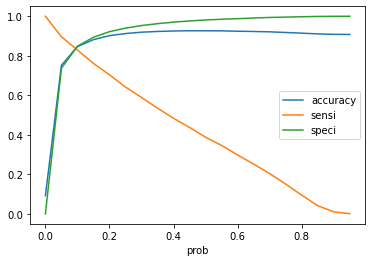

In [187]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### From the curve above, 0.1 is the optimum point to take it as a cutoff probability.

In [188]:
# Predicting the outcomes with probability cutoff as 0.10 by creating new columns in the final dataset

y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map(lambda x:1 if x >0.10 else 0 )  # Predicted value 

y_train_pred_final.head()

,Churn,Churn_Prob,ID,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,final_predicted
id,,,,,,,,,,,,,,,,,,,,,,,,
39967,0,0.016626,39967,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
54093,0,0.019295,54093,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31379,0,0.006597,31379,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50297,0,0.002398,50297,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14563,0,0.016077,14563,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [189]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.8465537820396107

In [190]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[38070,  6806],
       [  779,  3776]], dtype=int64)

In [191]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [192]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8289791437980242

In [193]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8289791437980242

### Precision & Recall

In [194]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion

array([[38070,  6806],
       [  779,  3776]], dtype=int64)

In [195]:
print('Precision :',round(confusion[1,1]/(confusion[0,1]+confusion[1,1]),2))   # Printing Pecision score
print('Recall    :',round(confusion[1,1]/(confusion[1,0]+confusion[1,1]),2))       # Printing Recall score

Precision : 0.36
Recall    : 0.83


# Step 6: Making predictions on the test set

### Feature engineering on test data:

In [196]:
X_test[impute_cols_numeric] = imp.transform(X_test[impute_cols_numeric])

In [197]:
superscript =["arpu_","onnet_mou_","offnet_mou_","roam_ic_mou_","roam_og_mou_","loc_og_t2t_mou_","loc_og_t2m_mou_","loc_og_t2f_mou_","loc_og_t2c_mou_",
"loc_og_mou_","std_og_t2t_mou_","std_og_t2m_mou_","std_og_t2f_mou_","std_og_mou_","isd_og_mou_","spl_og_mou_","og_others_","total_og_mou_","loc_ic_t2t_mou_",
"loc_ic_t2m_mou_","loc_ic_t2f_mou_","loc_ic_mou_","std_ic_t2t_mou_","std_ic_t2m_mou_","std_ic_t2f_mou_","std_ic_mou_","total_ic_mou_",
"spl_ic_mou_","isd_ic_mou_","ic_others_","total_rech_num_","total_rech_amt_","vol_2g_mb_",
"vol_3g_mb_","monthly_2g_","sachet_2g_","monthly_3g_","sachet_3g_"]

list_of_superscript_cols =[]
for i in range(len(superscript)):
    cols = list(X_test.columns[X_test.columns.str.startswith(superscript[i])])
    list_of_superscript_cols.append(cols)
    
print(list_of_superscript_cols )

for i in range(len(superscript)):
    X_test[superscript[i]+"sum"]=X_test[list_of_superscript_cols[i]].sum(axis=1)
print(X_test.shape)

[['arpu_6', 'arpu_7', 'arpu_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8'], ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8'], ['offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'], ['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8'], ['roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8'], ['loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8'], ['loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8'], ['loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8'], ['loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8'], ['loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8'], ['std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8'], ['std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8'], ['std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8'], ['std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8'], ['isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8'], ['spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8'], ['og_others_6', 'og_others_7', 'og_others_8'], ['tot

In [198]:
X_test['vbc_3g_sum'] = X_test[['aug_vbc_3g','jul_vbc_3g','jun_vbc_3g']].sum(axis=1)

In [199]:
col = ['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']
X_test.drop(col, axis=1, inplace=True)

In [200]:
X_test.drop(high_corrs_to_drop, axis=1, inplace=True)

In [201]:
X_test.drop(impute_cols_non_numeric, axis=1, inplace=True)

In [202]:
X_test.shape

(14000, 183)

In [203]:
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,arpu_sum,onnet_mou_sum,offnet_mou_sum,roam_ic_mou_sum,roam_og_mou_sum,loc_og_t2f_mou_sum,loc_og_t2c_mou_sum,std_og_t2t_mou_sum,std_og_t2m_mou_sum,std_og_t2f_mou_sum,std_og_mou_sum,isd_og_mou_sum,spl_og_mou_sum,og_others_sum,total_og_mou_sum,loc_ic_t2m_mou_sum,loc_ic_t2f_mou_sum,std_ic_t2t_mou_sum,std_ic_t2m_mou_sum,std_ic_t2f_mou_sum,std_ic_mou_sum,spl_ic_mou_sum,isd_ic_mou_sum,ic_others_sum,total_rech_num_sum,vol_2g_mb_sum,vol_3g_mb_sum,monthly_2g_sum,sachet_2g_sum,monthly_3g_sum,sachet_3g_sum,vbc_3g_sum
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
21669,1208.844,926.392,873.722,1830.39,2349.91,1744.940,769.01,128.93,147.880,23.01,0.00,107.88,27.24,0.00,38.08,19.08,14.03,11.96,83.79,66.99,42.84,0.00,1.19,1.03,0.00,3.33,0.0,102.88,82.23,55.84,1803.14,2335.88,1716.63,666.13,54.39,82.26,0.0,0.0,0.0,2469.28,2390.28,1798.890,0.0,0.0,0.0,0.00,6.78,0.00,0.00,0.0,0.0,2572.16,2479.29,1854.74,31.61,75.41,46.26,275.51,326.28,136.11,6.49,10.13,12.01,313.63,411.83,194.39,76.08,123.31,133.21,58.43,12.74,7.68,0.55,0.00,0.0,135.06,136.06,140.89,448.98,547.89,337.26,0.28,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.96,14,11,11,1377,1076,969,198,130,144,198,130,26,1.0,NaN,1.0,198.0,NaN,23.0,1.0,NaN,0.0,0.0,NaN,1.0,198.0,NaN,23.0,8.84,0.00,71.37,0.0,0.00,0.00,0.0,NaN,19.63,5.0,NaN,23.51,0.0,NaN,0.0,1,0,0,0,0,0,0,0,0,0,0,1,1.0,NaN,0.0,284,0.00,0.00,0.00,3057.098,5925.240,1045.820,130.89,65.32,2.22,3.33,5855.65,802.78,0.0,6658.450,0.0,6.78,0.00,6906.19,737.90,28.63,332.60,78.85,0.55,412.01,0.28,0.0,1.96,36,80.21,0.00,1,0,0,1,0.00
67359,678.664,611.950,339.516,898.14,76.44,222.660,373.59,1043.21,388.980,0.00,0.60,4.51,0.00,85.96,39.48,3.81,4.28,0.00,6.54,4.78,0.00,0.00,0.00,0.00,0.00,0.00

### Feature scaling

In [204]:
scale_num_cols= list(X_train_out_removed.columns) # these columns are x_train_final dataset columns
X_test[scale_num_cols] = pt.transform(X_test[scale_num_cols])

In [205]:
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,arpu_sum,onnet_mou_sum,offnet_mou_sum,roam_ic_mou_sum,roam_og_mou_sum,loc_og_t2f_mou_sum,loc_og_t2c_mou_sum,std_og_t2t_mou_sum,std_og_t2m_mou_sum,std_og_t2f_mou_sum,std_og_mou_sum,isd_og_mou_sum,spl_og_mou_sum,og_others_sum,total_og_mou_sum,loc_ic_t2m_mou_sum,loc_ic_t2f_mou_sum,std_ic_t2t_mou_sum,std_ic_t2m_mou_sum,std_ic_t2f_mou_sum,std_ic_mou_sum,spl_ic_mou_sum,isd_ic_mou_sum,ic_others_sum,total_rech_num_sum,vol_2g_mb_sum,vol_3g_mb_sum,monthly_2g_sum,sachet_2g_sum,monthly_3g_sum,sachet_3g_sum,vbc_3g_sum
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
21669,2.832042,2.255773,2.020680,2.397565,2.500296,2.338951,1.769444,0.225555,0.328358,2.295698,-0.389966,2.691616,2.256697,-0.391461,2.687655,0.318823,0.159218,0.063547,0.494197,0.353488,0.055931,-0.751114,0.759624,0.711467,-0.461801,2.252770,-0.492962,0.323534,0.184923,-0.065717,1.691270,1.701513,1.688943,1.636195,0.969197,1.127597,-0.355324,-0.342862,-0.341059,1.802463,1.765659,1.694795,-0.204951,-0.197002,-0.187241,-0.754551,1.399317,-0.824309,-0.447204,-0.05517,-0.064369,2.530141,2.434400,2.093068,0.485755,1.050103,0.730586,1.344720,1.534379,0.690635,0.883209,1.077751,1.174536,1.051613,1.341957,0.612754,1.759764,1.774675,1.784731,1.504403,0.899466,0.678017,1.537855,-0.489883,-0.492298,1.663009,1.640505,1.673963,1.248035,1.471708,0.964701,2.093370,-0.344017,-0.364632,-0.390242,-0.408888,-0.399834,-0.501067,-0.466238,2.419027,1.174709,0.825050,0.880483,2.172444,1.770818,1.589611,1.063673,0.569922,0.641055,1.398605,1.097325,0.161884,1.0,NaN,1.0,198.0,NaN,23.0,1.0,NaN,0.0,0.0,NaN,1.0,198.0,NaN,23.0,1.842536,-0.510132,2.037069,-0.401608,-0.414533,-0.422160,0.0,NaN,19.63,5.0,NaN,23.51,0.0,NaN,0.0,3.636022,-0.2

In [206]:
X_test.shape

(14000, 183)

In [207]:
X_test_final = X_test.copy()
X_test_final.to_csv("test_final_after_scaling.csv")

In [208]:
X_train_6.columns

Index(['arpu_7', 'roam_ic_mou_8', 'std_og_mou_8', 'total_og_mou_6',
       'loc_ic_mou_8', 'total_ic_mou_7', 'spl_ic_mou_8', 'total_rech_num_8',
       'max_rech_amt_7', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8',
       'aon', 'onnet_mou_sum', 'offnet_mou_sum'],
      dtype='object')

In [209]:
X_test = X_test[X_train_6.columns]

In [210]:
X_test_sm = sm.add_constant(X_test)

In [211]:
y_test_pred = reg6.predict(X_test_sm)

In [212]:
y_test_pred 

id
21669    0.084329
67359    0.087460
67606    0.004949
52029    0.550617
8349     0.042711
33438    0.050160
46375    0.038010
68775    0.010027
13203    0.026596
4849     0.018287
40223    0.008663
47063    0.004151
58141    0.013913
61164    0.014727
23946    0.061963
190      0.007890
21779    0.057271
17990    0.115574
61863    0.033469
41629    0.003548
63487    0.022619
2971     0.099704
59395    0.024419
27228    0.007241
28051    0.009212
40245    0.051933
38348    0.001478
42594    0.003879
24495    0.756904
41411    0.049343
23890    0.001383
69962    0.299410
31704    0.018136
69958    0.032283
8805     0.007422
29367    0.006048
49275    0.186172
2588     0.137245
42729    0.006206
6836     0.046076
6593     0.016469
5729     0.014347
29870    0.006598
22242    0.175018
35600    0.005373
20284    0.438362
60080    0.184153
25369    0.409252
32555    0.001375
19387    0.086215
859      0.015424
58103    0.012325
14664    0.327252
68362    0.069692
64618    0.117691
25730  

In [213]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [214]:
# Let's see the head
y_pred_1.head()

,0
id,
21669,0.084329
67359,0.087460
67606,0.004949
52029,0.550617
8349,0.042711


In [215]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [216]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [217]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [218]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [219]:
y_pred_final.head()

,churn_probability,CustID,0
0,0,21669,0.084329
1,0,67359,0.087460
2,0,67606,0.004949
3,1,52029,0.550617
4,0,8349,0.042711


In [220]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [221]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 'churn_probability' : 'Churn'})

In [222]:
# Rearranging the columns
y_pred_final = y_pred_final[['CustID','Churn','Churn_Prob']]

In [223]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Churn,Churn_Prob
0,21669,0,0.084329
1,67359,0,0.087460
2,67606,0,0.004949
3,52029,1,0.550617
4,8349,0,0.042711


In [224]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.1 else 0)

In [225]:
y_pred_final.head()

,CustID,Churn,Churn_Prob,final_predicted
0,21669,0,0.084329,0
1,67359,0,0.087460,0
2,67606,0,0.004949,0
3,52029,1,0.550617,1
4,8349,0,0.042711,0


In [226]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.8403571428571428

In [227]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

array([[10595,  1979],
       [  256,  1170]], dtype=int64)

In [228]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [229]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.820476858345021

In [230]:
# Let us calculate specificity
TN / float(TN+FP)

0.8426117385080324

# Step 7: Building models with PC's

### PCA on the data

#### Note - 
- While computng the principal components, we must not include the entire dataset. Model building is all about doing well on the data we haven't seen yet!
- So we'll calculate the PCs using the train data, and apply them later on the test data

In [231]:
pca = PCA(random_state=42)

In [232]:
pca.fit(X_train_final)

PCA(random_state=42)

In [233]:
pca.components_

array([[ 1.26484037e-01,  1.34126003e-01,  1.28723119e-01, ...,
         2.66948208e-02,  9.30722872e-03,  2.19641426e-02],
       [-3.57922655e-03, -1.34722769e-02, -7.96249664e-03, ...,
         5.28333485e-02,  3.70112097e-02,  9.12982982e-02],
       [ 6.29526174e-02,  7.49428344e-02,  7.20027824e-02, ...,
         1.43678330e-01,  1.38304142e-01,  2.09513111e-01],
       ...,
       [-2.12287330e-05,  5.64380202e-04, -1.22007580e-04, ...,
         3.71102315e-04, -1.00415969e-03,  2.36937495e-03],
       [-1.53990905e-03,  4.77368141e-04,  6.74504650e-05, ...,
         4.37499949e-04, -1.64617230e-04,  6.21727631e-04],
       [-5.21612611e-04,  9.29353851e-04, -1.20702705e-03, ...,
        -1.28310645e-03,  1.88410668e-04,  3.11645145e-04]])

In [234]:
pca.explained_variance_ratio_

array([1.71894205e-01, 1.14198697e-01, 7.29015233e-02, 4.22964540e-02,
       3.47018853e-02, 3.30228943e-02, 2.46036249e-02, 2.36127717e-02,
       2.15643480e-02, 2.05659883e-02, 1.97474931e-02, 1.84781853e-02,
       1.84129997e-02, 1.52791112e-02, 1.46637387e-02, 1.38454318e-02,
       1.15396076e-02, 1.12512015e-02, 1.08985570e-02, 1.04137910e-02,
       1.02488162e-02, 9.98532744e-03, 9.35213976e-03, 8.60232957e-03,
       8.42695855e-03, 7.81532662e-03, 7.74279807e-03, 7.47117005e-03,
       7.13724583e-03, 6.38835214e-03, 6.22401794e-03, 6.08469129e-03,
       5.77828172e-03, 5.44268328e-03, 5.29875668e-03, 5.02099329e-03,
       4.91089474e-03, 4.81643406e-03, 4.79856677e-03, 4.70416669e-03,
       4.55595017e-03, 4.47081515e-03, 4.37770098e-03, 4.26218418e-03,
       4.06526668e-03, 3.94268016e-03, 3.90530625e-03, 3.85752765e-03,
       3.77155479e-03, 3.62909324e-03, 3.53696985e-03, 3.51488790e-03,
       3.42373104e-03, 3.28716907e-03, 3.23419346e-03, 3.17945266e-03,
      

In [235]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

In [236]:
var_cumu

array([0.17189421, 0.2860929 , 0.35899443, 0.40129088, 0.43599276,
       0.46901566, 0.49361928, 0.51723206, 0.5387964 , 0.55936239,
       0.57910989, 0.59758807, 0.61600107, 0.63128018, 0.64594392,
       0.65978935, 0.67132896, 0.68258016, 0.69347872, 0.70389251,
       0.71414133, 0.72412665, 0.73347879, 0.74208112, 0.75050808,
       0.75832341, 0.76606621, 0.77353738, 0.78067462, 0.78706297,
       0.79328699, 0.79937168, 0.80514996, 0.81059265, 0.8158914 ,
       0.8209124 , 0.82582329, 0.83063973, 0.83543829, 0.84014246,
       0.84469841, 0.84916923, 0.85354693, 0.85780911, 0.86187438,
       0.86581706, 0.86972236, 0.87357989, 0.87735145, 0.88098054,
       0.88451751, 0.8880324 , 0.89145613, 0.8947433 , 0.89797749,
       0.90115694, 0.90423731, 0.90727491, 0.91024061, 0.91313352,
       0.91596983, 0.91878553, 0.92146829, 0.92412341, 0.92673783,
       0.92921069, 0.93166622, 0.93406089, 0.93637656, 0.93857   ,
       0.94070409, 0.94280672, 0.94477239, 0.94671009, 0.94859

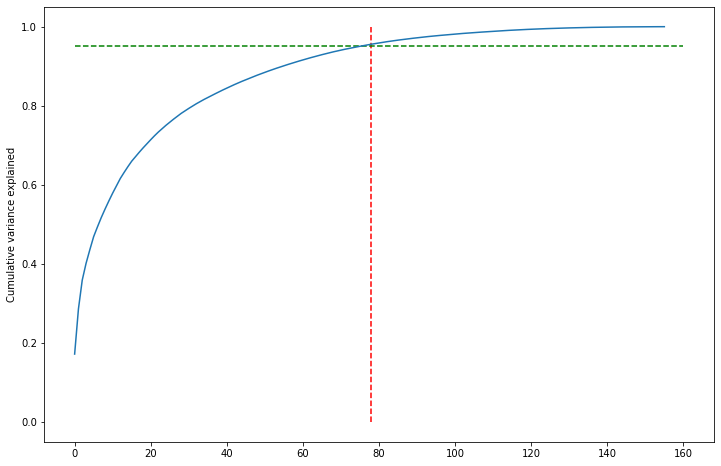

In [237]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=78, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=160, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [238]:
pca_final = IncrementalPCA(n_components=78)

In [239]:
df_train_pca = pca_final.fit_transform(X_train_final)

In [240]:
df_train_pca.shape

(49431, 78)

In [241]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [242]:
corrmat.shape

(78, 78)

In [243]:
# plt.figure(figsize=[15,15])
# sns.heatmap(corrmat, annot=True)

<AxesSubplot:>

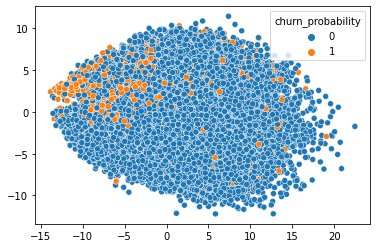

In [244]:
sns.scatterplot(x=df_train_pca[:,0], y=df_train_pca[:,1], hue=y_train)

In [245]:
X_test = pd.read_csv("test_final_after_scaling.csv",index_col=0)

In [246]:
X_test = X_test[X_train_final.columns]
X_test.shape

(14000, 156)

In [247]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(14000, 78)

In [248]:
df_test_pca[:5,:]

array([[ 1.13642409e+01,  4.78549639e+00,  2.65267545e+00,
         4.46129183e-03,  9.04958546e-02,  1.77213942e+00,
         2.07461179e+00, -1.70176798e+00, -3.63824569e+00,
        -1.87909832e+00, -1.02645679e+00,  2.38763319e+00,
         7.38215174e-01,  2.92744622e-01,  1.38675449e+00,
        -7.64272033e-01,  3.57103753e+00,  3.13499531e-01,
         2.48335810e+00,  4.18487341e-02, -4.47528431e-01,
         9.78669242e-01,  1.74389935e+00,  1.48068103e+00,
         5.35133120e-01, -1.48135188e+00,  1.74979265e+00,
        -6.82228290e-01, -2.18914479e+00,  4.24458842e-03,
        -1.15559251e+00, -2.00205186e+00,  1.37115315e+00,
        -2.10360352e+00,  5.53394768e-02,  5.01215707e-01,
        -1.21047097e+00, -1.27864606e+00, -2.38989226e+00,
        -1.92565448e+00, -6.57906393e-01, -1.27434964e+00,
         2.01301121e-01,  2.40489287e+00, -9.42378623e-01,
         2.20446938e+00, -1.36975469e+00,  2.60467971e+00,
        -4.93565472e-01, -1.22191846e+00,  1.36834500e+0

## Logistic Regression on Principal Components

In [249]:

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
             'penalty' : ['l1', 'l2', 'elasticnet'],
              'fit_intercept':[True,False],
              'class_weight':[None,'balanced'],
             'solver' : ['liblinear']}
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gs = GridSearchCV(LogisticRegression(), return_train_score=True,verbose=1,n_jobs=-1,
                  param_grid=param_grid, scoring=scoring, cv=5, refit='Accuracy')

gs.fit(df_train_pca, y_train)
results = gs.cv_results_


print("best params: " + str(gs.best_estimator_))
print("best params: " + str(gs.best_params_))
print('best score:', gs.best_score_)


# 0 ,1,0,0
# 1 ,0,1,1

# l1-|0-1+|1-0|+|0-1|+|0-1|
# l2 - (0-1)^2+(1-0)^2+(0-1)^2+(0-1)^2
# min sse


Fitting 5 folds for each of 84 candidates, totalling 420 fits
best params: LogisticRegression(C=0.1, solver='liblinear')
best params: {'C': 0.1, 'class_weight': None, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'liblinear'}
best score: 0.9403613042635678


In [250]:
learner_pca = LogisticRegression(C=0.1, solver='liblinear', penalty='l2', fit_intercept = True, class_weight = None)

In [251]:
model_pca = learner_pca.fit(df_train_pca, y_train)

In [252]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [253]:
"{:2.5}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.92827'

In [254]:
# Creating a new dataset and saving predicted values in it
pred_probs_train = model_pca.predict_proba(df_train_pca)## will get probs of class o and class 1 as twocolumns
y_train_pred = pred_probs_train[:,1]
y_train_pred_final_PCA=pd.DataFrame({'Churn':y_train.values,'Churn_Prob':y_train_pred,'ID':y_train.index})
y_train_pred_final_PCA.head()   # viewing first 5 rows

,Churn,Churn_Prob,ID
0,0,0.018792,39967
1,0,0.012266,54093
2,0,0.005515,31379
3,0,0.005996,50297
4,0,0.021768,14563


In [255]:
# creating 10 points out of which one we will choose for our cutoff point

numb=[float(5*x)/100 for x in range(20)]  # from 0 to 0.95 with set size 0.05

for i in numb:
    y_train_pred_final_PCA[i]= y_train_pred_final_PCA.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final_PCA.head()

,Churn,Churn_Prob,ID,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95
0,0,0.018792,39967,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.012266,54093,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.005515,31379,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.005996,50297,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.021768,14563,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [256]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])


In [257]:
num = [float(5*x)/100 for x in range(20)]  # from 0 to 0.95 with set size 0.05
for i in num:
    cm1 = metrics.confusion_matrix( y_train_pred_final_PCA.Churn,  y_train_pred_final_PCA[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.00  0.00  0.092149  1.000000  0.000000
0.05  0.05  0.801542  0.901427  0.791403
0.10  0.10  0.884405  0.840615  0.888849
0.15  0.15  0.911958  0.790560  0.924280
0.20  0.20  0.925229  0.751701  0.942842
0.25  0.25  0.932148  0.721186  0.953561
0.30  0.30  0.936963  0.689133  0.962118
0.35  0.35  0.939127  0.655104  0.967956
0.40  0.40  0.940301  0.623930  0.972413
0.45  0.45  0.940665  0.590560  0.976201
0.50  0.50  0.940968  0.555873  0.980056
0.55  0.55  0.940179  0.513502  0.983488
0.60  0.60  0.937630  0.460154  0.986095
0.65  0.65  0.935304  0.409879  0.988635
0.70  0.70  0.933159  0.357409  0.991599
0.75  0.75  0.929376  0.295499  0.993716
0.80  0.80  0.925472  0.232931  0.995766
0.85  0.85  0.920536  0.163337  0.997393
0.90  0.90  0.915134  0.087157  0.999176
0.95  0.95  0.909389  0.017344  0.999933


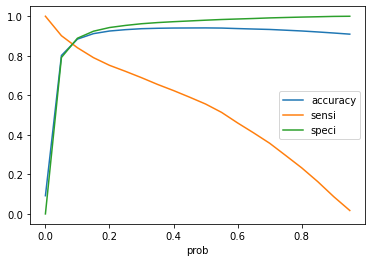

In [258]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [259]:
# Predicting the outcomes with probability cutoff as 0.10 by creating new columns in the final dataset

y_train_pred_final_PCA['final_predicted'] = y_train_pred_final_PCA.Churn_Prob.map(lambda x:1 if x >0.10 else 0 )  # Predicted value 

y_train_pred_final_PCA.head()


,Churn,Churn_Prob,ID,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,final_predicted
0,0,0.018792,39967,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.012266,54093,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.005515,31379,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.005996,50297,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.021768,14563,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [260]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final_PCA.Churn, y_train_pred_final_PCA.final_predicted)

0.8844045234771702

In [261]:
y_test_pred_pca = model_pca.predict_proba(df_test_pca)[:,1]

In [262]:
# Converting y_pred to a dataframe which is an array
y_pred_2 = pd.DataFrame(y_test_pred_pca)

In [263]:
# Let's see the head
y_pred_2.head()


,0
0,0.043438
1,0.070576
2,0.006753
3,0.750797
4,0.014762


In [264]:
# Converting y_test to dataframe
y_test_df_2 = pd.DataFrame(y_test)



In [265]:
# Putting CustID to index
y_test_df_2['CustID'] = y_test_df_2.index


In [266]:
# Removing index for both dataframes to append them side by side 
y_pred_2.reset_index(drop=True, inplace=True)
y_test_df_2.reset_index(drop=True, inplace=True)


In [267]:
# Appending y_test_df and y_pred_1
y_pred_final_2 = pd.concat([y_test_df_2, y_pred_2],axis=1)

In [268]:
# Renaming the column 
y_pred_final_2= y_pred_final_2.rename(columns={ 0 : 'Churn_Prob'})
# Renaming the column 
y_pred_final_2= y_pred_final_2.rename(columns={ 'churn_probability' : 'Churn'})

# Rearranging the columns
y_pred_final_2= y_pred_final_2[['CustID','Churn','Churn_Prob']]

# Let's see the head of y_pred_final
y_pred_final_2.head()

,CustID,Churn,Churn_Prob
0,21669,0,0.043438
1,67359,0,0.070576
2,67606,0,0.006753
3,52029,1,0.750797
4,8349,0,0.014762


In [269]:
y_pred_final_2['final_predicted'] = y_pred_final_2.Churn_Prob.map(lambda x: 1 if x > 0.1 else 0)

y_pred_final_2.head()

,CustID,Churn,Churn_Prob,final_predicted
0,21669,0,0.043438,0
1,67359,0,0.070576,0
2,67606,0,0.006753,0
3,52029,1,0.750797,1
4,8349,0,0.014762,0


In [270]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final_2.Churn, y_pred_final_2.final_predicted)

0.8759285714285714

In [271]:
learner_pca2 = LogisticRegression(C=0.1, solver='liblinear', penalty='l2', fit_intercept = True, class_weight = 'balanced')

In [272]:
model_pca2 = learner_pca2.fit(df_train_pca, y_train)

In [273]:
pred_probs_test2 = model_pca2.predict_proba(df_test_pca)

In [274]:
"{:2.5}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.92827'

## Random Forest on Principal Components

In [275]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [276]:
%%time
rf.fit(df_train_pca, y_train)

Wall time: 2.41 s


RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [277]:
rf.oob_score_

0.9111488741882624

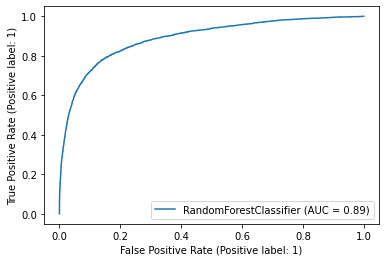

In [278]:
plot_roc_curve(rf, df_train_pca, y_train)
plt.show()

### Hyper-parameter tuning for the Random Forest

In [279]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [280]:
params = {
    'max_depth': [2,3,5,10],
    'min_samples_leaf': [5,10,50,100,200],
    'n_estimators': [25, 50, 100],
    'class_weight':['balanced', 'balanced_subsample']
}

In [281]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [282]:
%%time
grid_search.fit(df_train_pca, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits
Wall time: 34min 33s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [5, 10, 50, 100, 200],
                         'n_estimators': [25, 50, 100]},
             scoring='accuracy', verbose=1)

In [283]:
grid_search.best_score_

0.9251482173740352

In [284]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(class_weight='balanced_subsample', max_depth=10,
                       min_samples_leaf=5, n_jobs=-1, random_state=42)

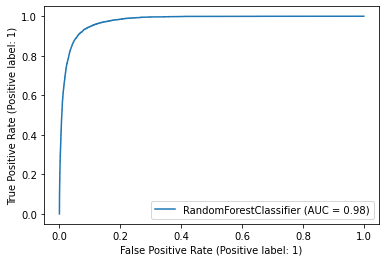

In [285]:
plot_roc_curve(rf_best, df_train_pca, y_train)
plt.show()

In [286]:
rf_best.feature_importances_

array([0.07277441, 0.08212433, 0.02318234, 0.01912935, 0.00668687,
       0.20654471, 0.01356236, 0.00580469, 0.00380887, 0.00633112,
       0.00352984, 0.01993852, 0.00661062, 0.04977226, 0.02374375,
       0.03172175, 0.00704223, 0.0031786 , 0.01411374, 0.03285128,
       0.0034137 , 0.00880906, 0.0068767 , 0.00489099, 0.00467655,
       0.02444542, 0.00722714, 0.00868387, 0.0226406 , 0.0040735 ,
       0.01246925, 0.00751166, 0.00334735, 0.02302758, 0.01280802,
       0.00414666, 0.00532567, 0.00268119, 0.00372525, 0.00325218,
       0.00828919, 0.00224255, 0.00331306, 0.00721157, 0.00327851,
       0.00372072, 0.00328131, 0.00613964, 0.00333383, 0.00394674,
       0.00400701, 0.00309127, 0.00321697, 0.00481873, 0.0085337 ,
       0.00920025, 0.01399884, 0.01448843, 0.00358416, 0.00673348,
       0.00407628, 0.00873697, 0.00570506, 0.00250024, 0.00480682,
       0.0029385 , 0.00301051, 0.00330348, 0.00530384, 0.00329476,
       0.00311022, 0.00270115, 0.00527567, 0.00844652, 0.00315

In [287]:
df_train_pca.shape


(49431, 78)

In [288]:
pc_columns = ["pc_"+str(i) for i in range(1,79)]


In [289]:
imp_df = pd.DataFrame({
    "Varname": pc_columns,
    "Imp": rf_best.feature_importances_
})

In [290]:
imp_df

,Varname,Imp
0,pc_1,0.072774
1,pc_2,0.082124
2,pc_3,0.023182
3,pc_4,0.019129
4,pc_5,0.006687
5,pc_6,0.206545
6,pc_7,0.013562
7,pc_8,0.005805
8,pc_9,0.003809
9,pc_10,0.006331


In [291]:
# Creating a new dataset and saving predicted values in it
pred_probs_train_rf = rf_best.predict_proba(df_train_pca)## will get probs of class o and class 1 as twocolumns
y_train_pred_rf = pred_probs_train_rf[:,1]
y_train_pred_final_rf=pd.DataFrame({'Churn':y_train.values,'Churn_Prob':y_train_pred_rf,'ID':y_train.index})
y_train_pred_final_rf.head()   # viewing first 5 rows


,Churn,Churn_Prob,ID
0,0,0.184263,39967
1,0,0.145817,54093
2,0,0.096690,31379
3,0,0.082958,50297
4,0,0.340031,14563


In [292]:
# creating 10 points out of which one we will choose for our cutoff point

numb=[float(5*x)/100 for x in range(20)]  # from 0 to 0.95 with set size 0.05

for i in numb:
    y_train_pred_final_rf[i]=y_train_pred_final_rf.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final_rf.head()

,Churn,Churn_Prob,ID,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95
0,0,0.184263,39967,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.145817,54093,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.096690,31379,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.082958,50297,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.340031,14563,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [293]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])


In [294]:
num = [float(5*x)/100 for x in range(20)]  # from 0 to 0.95 with set size 0.05
for i in num:
    cm1 = metrics.confusion_matrix( y_train_pred_final_rf.Churn,  y_train_pred_final_rf[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.00  0.00  0.092149  1.000000  0.000000
0.05  0.05  0.100564  1.000000  0.009270
0.10  0.10  0.297829  1.000000  0.226558
0.15  0.15  0.526734  0.999122  0.478786
0.20  0.20  0.687686  0.997146  0.656275
0.25  0.25  0.784224  0.990999  0.763236
0.30  0.30  0.844369  0.977827  0.830823
0.35  0.35  0.884931  0.961800  0.877128
0.40  0.40  0.912565  0.939627  0.909818
0.45  0.45  0.930347  0.915038  0.931901
0.50  0.50  0.941858  0.885840  0.947544
0.55  0.55  0.949263  0.847420  0.959600
0.60  0.60  0.953450  0.801317  0.968892
0.65  0.65  0.955716  0.745993  0.977003
0.70  0.70  0.954684  0.673106  0.983265
0.75  0.75  0.951913  0.584413  0.989215
0.80  0.80  0.944387  0.461910  0.993359
0.85  0.85  0.932836  0.299451  0.997125
0.90  0.90  0.921021  0.151482  0.999131
0.95  0.95  0.913455  0.061910  0.999889


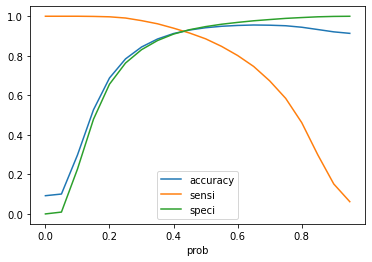

In [295]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [296]:
# Predicting the outcomes with probability cutoff as 0.10 by creating new columns in the final dataset

y_train_pred_final_rf['final_predicted'] = y_train_pred_final_rf.Churn_Prob.map(lambda x:1 if x >0.45 else 0 )  # Predicted value 

y_train_pred_final_rf.head()

,Churn,Churn_Prob,ID,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,final_predicted
0,0,0.184263,39967,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.145817,54093,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.096690,31379,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.082958,50297,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.340031,14563,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [297]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final_rf.Churn, y_train_pred_final_rf.final_predicted)


0.9303473528757258

In [298]:
y_test_pred_rf = rf_best.predict_proba(df_test_pca)[:,1]

In [299]:
rf_test_results =pd.DataFrame()

In [300]:
rf_test_results["id"] = y_test.index
rf_test_results["Churn_prob"] = y_test_pred_rf
rf_test_results["Churn"] = y_test.values
rf_test_results['Churn_predicted'] = rf_test_results.Churn_prob.map(lambda x:1 if x >0.45 else 0 )  # Predicted value 


In [301]:
rf_test_results.head()

,id,Churn_prob,Churn,Churn_predicted
0,21669,0.263192,0,0
1,67359,0.440366,0,0
2,67606,0.274461,0,0
3,52029,0.939216,1,1
4,8349,0.194963,0,0


In [302]:
# Let's check the overall accuracy.
metrics.accuracy_score(rf_test_results.Churn, rf_test_results.Churn_predicted)


0.9031428571428571

### XGBoostClassifier on Principal Components

In [303]:

xgclf = xgb.XGBClassifier()

xgclf.fit(df_train_pca, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [304]:
print('AUC on train data by XGBoost =', metrics.roc_auc_score(y_true=y_train,
                                                              y_score=xgclf.predict_proba(df_train_pca)[:, 1]))

AUC on train data by XGBoost = 0.9986031762214582


In [305]:
print('AUC on test data by XGBoost =', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=xgclf.predict_proba(df_test_pca)[:, 1]))

AUC on test data by XGBoost = 0.9293812885780693


In [306]:
xgb_model = xgb.XGBClassifier()

# Run of default-hyperparameters
parameters = {'learning_rate': [0.01, 0.1,0.3],
              'max_depth': [2,3,6],
              'n_estimators': [50,100,150],
               'scale_pos_weight' : [1,9]}

scorer = metrics.make_scorer(metrics.accuracy_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

clf_xgb = GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=4,
                                        verbose=1,
                                       scoring=scorer,
                                       refit=True)

clf_xgb.fit(df_train_pca, y_train)

Fitting 4 folds for each of 54 candidates, totalling 216 fits


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [307]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

{'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 50, 'scale_pos_weight': 1}
nan
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [308]:
# XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
#               importance_type='gain', interaction_constraints='',
#               learning_rate=0.01, max_delta_step=0, max_depth=2,
#               min_child_weight=1, missing=nan, monotone_constraints='()',
#               n_estimators=50, n_jobs=4, num_parallel_tree=1, random_state=0,
#               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
#               tree_method='exact', validate_parameters=1, verbosity=None)

In [309]:
xgb_best = clf_xgb.best_estimator_

In [310]:
# Creating a new dataset and saving predicted values in it
pred_probs_train_xgb = xgb_best.predict_proba(df_train_pca)## will get probs of class o and class 1 as twocolumns
y_train_pred_xgb = pred_probs_train_xgb[:,1]
y_train_pred_final_xgb=pd.DataFrame({'Churn':y_train.values,'Churn_Prob':y_train_pred_xgb,'ID':y_train.index})
y_train_pred_final_xgb.head()   # viewing first 5 rows


,Churn,Churn_Prob,ID
0,0,0.345341,39967
1,0,0.316229,54093
2,0,0.316229,31379
3,0,0.336908,50297
4,0,0.458796,14563


In [311]:
# creating 10 points out of which one we will choose for our cutoff point

numb=[float(5*x)/100 for x in range(20)]  # from 0 to 0.95 with set size 0.05
for i in numb:
    y_train_pred_final_xgb[i]=y_train_pred_final_xgb.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final_xgb.head()

,Churn,Churn_Prob,ID,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95
0,0,0.345341,39967,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.316229,54093,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.316229,31379,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.336908,50297,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.458796,14563,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0


In [312]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])


In [313]:
num = [float(5*x)/100 for x in range(20)]  # from 0 to 0.95 with set size 0.05
for i in num:
    cm1 = metrics.confusion_matrix( y_train_pred_final_xgb.Churn,  y_train_pred_final_xgb[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)


      prob  accuracy     sensi     speci
0.00  0.00  0.092149  1.000000  0.000000
0.05  0.05  0.092149  1.000000  0.000000
0.10  0.10  0.092149  1.000000  0.000000
0.15  0.15  0.092149  1.000000  0.000000
0.20  0.20  0.092149  1.000000  0.000000
0.25  0.25  0.092149  1.000000  0.000000
0.30  0.30  0.092149  1.000000  0.000000
0.35  0.35  0.874208  0.598683  0.902175
0.40  0.40  0.895693  0.471570  0.938742
0.45  0.45  0.910259  0.372997  0.964792
0.50  0.50  0.911452  0.064544  0.997415
0.55  0.55  0.907851  0.000000  1.000000
0.60  0.60  0.907851  0.000000  1.000000
0.65  0.65  0.907851  0.000000  1.000000
0.70  0.70  0.907851  0.000000  1.000000
0.75  0.75  0.907851  0.000000  1.000000
0.80  0.80  0.907851  0.000000  1.000000
0.85  0.85  0.907851  0.000000  1.000000
0.90  0.90  0.907851  0.000000  1.000000
0.95  0.95  0.907851  0.000000  1.000000


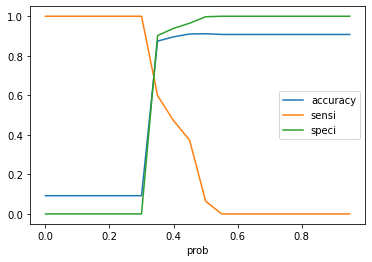

In [314]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [315]:
# Predicting the outcomes with probability cutoff as 0.10 by creating new columns in the final dataset

y_train_pred_final_xgb['final_predicted'] = y_train_pred_final_xgb.Churn_Prob.map(lambda x:1 if x >0.45 else 0 )  # Predicted value 

y_train_pred_final_xgb.head()


,Churn,Churn_Prob,ID,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,final_predicted
0,0,0.345341,39967,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.316229,54093,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.316229,31379,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.336908,50297,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.458796,14563,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1


In [316]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final_xgb.Churn, y_train_pred_final_xgb.final_predicted)



0.9102587445125528

In [317]:
y_test_pred_xgb = xgb_best.predict_proba(df_test_pca)[:,1]

In [318]:
xgb_test_results =pd.DataFrame()

In [319]:
xgb_test_results["id"] = y_test.index
xgb_test_results["Churn_prob"] = y_test_pred_xgb
xgb_test_results["Churn"] = y_test.values
xgb_test_results['Churn_predicted'] = xgb_test_results.Churn_prob.map(lambda x:1 if x >0.45 else 0 )  # Predicted value 


In [320]:
xgb_test_results.head()

,id,Churn_prob,Churn,Churn_predicted
0,21669,0.316229,0,0
1,67359,0.397091,0,0
2,67606,0.398990,0,0
3,52029,0.512779,1,1
4,8349,0.397091,0,0


In [321]:
# Let's check the overall accuracy.
metrics.accuracy_score(xgb_test_results.Churn, xgb_test_results.Churn_predicted)


0.9019285714285714

# Nearest Neighbours on PCA

In [322]:
from sklearn.neighbors import KNeighborsClassifier

In [324]:
param_grid = {'n_neighbors': [5, 10,20, 50, 100, 150],
             'weights' : ['uniform', 'distance']}
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

knear = GridSearchCV(KNeighborsClassifier(), return_train_score=True,verbose=1,n_jobs=-1,
                  param_grid=param_grid, scoring=scoring, cv=5, refit='Accuracy')

knear.fit(df_train_pca, y_train)
results = knear.cv_results_


print("best params: " + str(knear.best_estimator_))
print("best params: " + str(knear.best_params_))
print('best score:', knear.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
best params: KNeighborsClassifier()
best params: {'n_neighbors': 5, 'weights': 'uniform'}
best score: nan


In [325]:
knear_best = knear.best_estimator_
knear_best

KNeighborsClassifier()

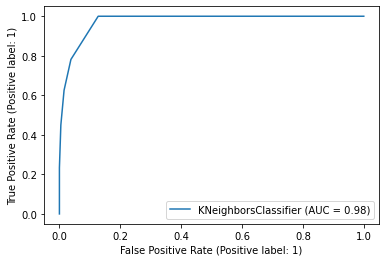

In [326]:
plot_roc_curve(knear_best, df_train_pca, y_train)
plt.show()

In [327]:
# Creating a new dataset and saving predicted values in it
pred_probs_train_knear = knear_best.predict_proba(df_train_pca)## will get probs of class o and class 1 as twocolumns
y_train_pred_knear = pred_probs_train_knear[:,1]
y_train_pred_final_knear=pd.DataFrame({'Churn':y_train.values,'Churn_Prob':y_train_pred_knear,'ID':y_train.index})
y_train_pred_final_knear.head()   # viewing first 5 rows


,Churn,Churn_Prob,ID
0,0,0.0,39967
1,0,0.0,54093
2,0,0.0,31379
3,0,0.0,50297
4,0,0.0,14563


In [328]:
# creating 10 points out of which one we will choose for our cutoff point

numb=[float(5*x)/100 for x in range(20)]  # from 0 to 0.95 with set size 0.05

for i in numb:
    y_train_pred_final_knear[i]=y_train_pred_final_knear.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final_knear.head()

,Churn,Churn_Prob,ID,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95
0,0,0.0,39967,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.0,54093,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.0,31379,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.0,50297,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.0,14563,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [329]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])


In [330]:
num = [float(5*x)/100 for x in range(20)]  # from 0 to 0.95 with set size 0.05
for i in num:
    cm1 = metrics.confusion_matrix( y_train_pred_final_knear.Churn,  y_train_pred_final_knear[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.00  0.00  0.884344  1.000000  0.872605
0.05  0.05  0.884344  1.000000  0.872605
0.10  0.10  0.884344  1.000000  0.872605
0.15  0.15  0.884344  1.000000  0.872605
0.20  0.20  0.945560  0.781559  0.962207
0.25  0.25  0.945560  0.781559  0.962207
0.30  0.30  0.945560  0.781559  0.962207
0.35  0.35  0.945560  0.781559  0.962207
0.40  0.40  0.951630  0.625467  0.984736
0.45  0.45  0.951630  0.625467  0.984736
0.50  0.50  0.951630  0.625467  0.984736
0.55  0.55  0.951630  0.625467  0.984736
0.60  0.60  0.945034  0.449835  0.995298
0.65  0.65  0.945034  0.449835  0.995298
0.70  0.70  0.945034  0.449835  0.995298
0.75  0.75  0.945034  0.449835  0.995298
0.80  0.80  0.929356  0.233370  1.000000
0.85  0.85  0.929356  0.233370  1.000000
0.90  0.90  0.929356  0.233370  1.000000
0.95  0.95  0.929356  0.233370  1.000000


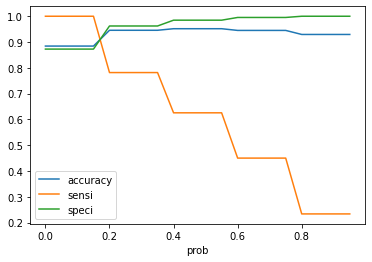

In [331]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [332]:
# Predicting the outcomes with probability cutoff as 0.10 by creating new columns in the final dataset

y_train_pred_final_knear['final_predicted'] = y_train_pred_final_knear.Churn_Prob.map(lambda x:1 if x >0.2 else 0 )  # Predicted value 

y_train_pred_final_knear.head()

,Churn,Churn_Prob,ID,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,final_predicted
0,0,0.0,39967,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.0,54093,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.0,31379,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.0,50297,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.0,14563,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [333]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final_knear.Churn, y_train_pred_final_knear.final_predicted)


0.9455604782423985

In [334]:
y_test_pred_knear = knear_best.predict_proba(df_test_pca)[:,1]

In [335]:
knear_test_results =pd.DataFrame()

In [336]:
knear_test_results["id"] = y_test.index
knear_test_results["Churn_prob"] = y_test_pred_knear
knear_test_results["Churn"] = y_test.values
knear_test_results['Churn_predicted'] = knear_test_results.Churn_prob.map(lambda x:1 if x >0.2 else 0 )  # Predicted value 


In [337]:
knear_test_results.head()

,id,Churn_prob,Churn,Churn_predicted
0,21669,0.2,0,0
1,67359,0.2,0,0
2,67606,0.0,0,0
3,52029,0.6,1,1
4,8349,0.0,0,0


In [338]:
# Let's check the overall accuracy.
metrics.accuracy_score(knear_test_results.Churn, knear_test_results.Churn_predicted)


0.9207142857142857

# Step 8: Final Stacking Model for Kaggle - Creating submission file

In [339]:
unseen.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [340]:
unseen[impute_cols_numeric] = imp.transform(unseen[impute_cols_numeric]) ###missing values imputation

In [341]:

for i in range(len(superscript)):
    unseen[superscript[i]+"sum"]=unseen[list_of_superscript_cols[i]].sum(axis=1)
print(unseen.shape)

(30000, 209)


In [342]:
unseen['vbc_3g_sum'] = unseen[['aug_vbc_3g','jul_vbc_3g','jun_vbc_3g']].sum(axis=1)

In [343]:
col = ['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']
unseen.drop(col, axis=1, inplace=True)

In [344]:
unseen.drop(high_corrs_to_drop, axis=1, inplace=True)

In [345]:
unseen.drop(impute_cols_non_numeric, axis=1, inplace=True)

In [346]:
unseen.shape

(30000, 197)

In [347]:
unseen.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,arpu_sum,onnet_mou_sum,offnet_mou_sum,roam_ic_mou_sum,roam_og_mou_sum,loc_og_t2f_mou_sum,loc_og_t2c_mou_sum,std_og_t2t_mou_sum,std_og_t2m_mou_sum,std_og_t2f_mou_sum,std_og_mou_sum,isd_og_mou_sum,spl_og_mou_sum,og_others_sum,total_og_mou_sum,loc_ic_t2m_mou_sum,loc_ic_t2f_mou_sum,std_ic_t2t_mou_sum,std_ic_t2m_mou_sum,std_ic_t2f_mou_sum,std_ic_mou_sum,spl_ic_mou_sum,isd_ic_mou_sum,ic_others_sum,total_rech_num_sum,vol_2g_mb_sum,vol_3g_mb_sum,monthly_2g_sum,sachet_2g_sum,monthly_3g_sum,sachet_3g_sum,vbc_3g_sum
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00,221.657,75.12,127.15,0.00,0.00,13.58,0.03,8.95,76.14,0.0,85.09,0.0,0.03,0.0,202.27,24.33,0.26,0.00,5.74,0.00,5.74,1.27,0.00,0.00,14,0.0,0.0,0,0,0,0,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598

### Feature scaling

In [348]:
scale_num_cols= list(X_train_out_removed.columns) # these columns are x_train_final dataset columns
unseen[scale_num_cols] = pt.transform(unseen[scale_num_cols])

In [349]:
unseen.set_index("id",inplace=True)

In [350]:
unseen.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,arpu_sum,onnet_mou_sum,offnet_mou_sum,roam_ic_mou_sum,roam_og_mou_sum,loc_og_t2f_mou_sum,loc_og_t2c_mou_sum,std_og_t2t_mou_sum,std_og_t2m_mou_sum,std_og_t2f_mou_sum,std_og_mou_sum,isd_og_mou_sum,spl_og_mou_sum,og_others_sum,total_og_mou_sum,loc_ic_t2m_mou_sum,loc_ic_t2f_mou_sum,std_ic_t2t_mou_sum,std_ic_t2m_mou_sum,std_ic_t2f_mou_sum,std_ic_mou_sum,spl_ic_mou_sum,isd_ic_mou_sum,ic_others_sum,total_rech_num_sum,vol_2g_mb_sum,vol_3g_mb_sum,monthly_2g_sum,sachet_2g_sum,monthly_3g_sum,sachet_3g_sum,vbc_3g_sum
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,-0.684641,-0.769880,-0.786366,-0.020049,-0.219026,-0.144838,-0.331397,-0.663370,-0.613630,-0.462259,-0.389966,-0.385707,-0.465426,-0.391461,-0.384342,0.470451,0.367354,0.387417,-0.453915,-0.714211,-0.840645,-0.751114,1.708222,-0.744878,-0.461801,-0.480253,-0.259580,-0.231953,-0.200675,-0.441030,0.664864,-0.816932,0.173511,0.880218,0.225520,0.754772,-0.355324,-0.342862,-0.341059,0.0,0.0,0.0,0.558704,-0.138862,0.391926,-0.204951,-0.197002,-0.187241,-0.754551,-0.812378,-0.758009,-0.447204,-0.05517,-0.064369,-0.275855,-0.560743,-0.464381,0.459989,0.595499,0.252062,-0.991245,-1.369125,-1.074173,-0.700896,-1.031666,-1.042583,-0.526564,-0.528023,-0.717493,-0.748682,-0.755697,-0.744473,-0.766067,-0.382427,0.377781,-0.491028,-0.489883,-0.492298,0.0,0.0,0.0,-1.035434,-0.728193,-0.061909,-0.599494,-0.603875,-0.670904,2.129510,2.980458,2.823

### PCA on the data

In [351]:
unseen = unseen[X_train_final.columns]
unseen.shape

(30000, 156)

In [352]:
df_unseen_pca = pca_final.transform(unseen)
df_unseen_pca.shape

(30000, 78)

In [353]:
data_for_stacking = pd.DataFrame()

In [354]:
data_for_stacking["Churn"] = y_test.values
data_for_stacking["log_reg"]=y_pred_final['final_predicted'].values
data_for_stacking["log_reg_pca"] =y_pred_final_2['final_predicted'].values
data_for_stacking["rf_pca"] = rf_test_results['Churn_predicted'].values
data_for_stacking["xgboost_pca"] = xgb_test_results['Churn_predicted'].values
data_for_stacking['knn_pca'] = knear_test_results['Churn_predicted'].values

In [355]:
data_for_stacking.head()

,Churn,log_reg,log_reg_pca,rf_pca,xgboost_pca,knn_pca
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,1,1,1,1,1,1
4,0,0,0,0,0,0


In [356]:
# build  y = b0+b1*log_reg+

# apply on unseen

# log_reg for unseen
# log_reg_pca for unseen
# rf_pca for unseen
# xgboostpca-for_unsee

# we will get a data matri x of 30000, 4 columns
# pass this dataset to log reg model built on x_test
# now we will get the final stacking predictions. 



### Individual Model Predictions on Unseen Data

In [357]:
predictions_unseen = pd.DataFrame()

In [359]:
predictions_unseen['log_reg_prob']     =  reg6.predict(sm.add_constant(unseen[X_train_6.columns]))
predictions_unseen['log_reg_pca_prob'] =  model_pca.predict_proba(df_unseen_pca)[:,1]
predictions_unseen['rf_pca_prob']      =  rf_best.predict_proba(df_unseen_pca)[:,1]
predictions_unseen['xgb_pca_prob']     =  xgb_best.predict_proba(df_unseen_pca)[:,1]
predictions_unseen['knn_pca_prob']     =  knear_best.predict_proba(df_unseen_pca)[:,1]


In [360]:
predictions_unseen.head()

,log_reg_prob,log_reg_pca_prob,rf_pca_prob,xgb_pca_prob,knn_pca_prob
id,,,,,
69999,0.010151,0.017477,0.177735,0.336908,0.0
70000,0.041746,0.037124,0.128395,0.316229,0.0
70001,0.643564,0.678793,0.693030,0.376811,0.8
70002,0.030194,0.028856,0.325714,0.316229,0.0
70003,0.016601,0.005742,0.158318,0.316229,0.0


In [361]:
predictions_unseen['log_reg']          = predictions_unseen.log_reg_prob.map(lambda x:1 if x > 0.10 else 0 )
predictions_unseen['log_reg_pca']      = predictions_unseen.log_reg_pca_prob.map(lambda x:1 if x > 0.10 else 0 )
predictions_unseen['rf_pca']           = predictions_unseen.rf_pca_prob.map(lambda x:1 if x > 0.45 else 0 )
predictions_unseen['xgboost_pca']      = predictions_unseen.xgb_pca_prob.map(lambda x:1 if x > 0.45 else 0 )
predictions_unseen['knn_pca']          = predictions_unseen.knn_pca_prob.map(lambda x:1 if x > 0.2 else 0 )

In [362]:
predictions_unseen.head()

,log_reg_prob,log_reg_pca_prob,rf_pca_prob,xgb_pca_prob,knn_pca_prob,log_reg,log_reg_pca,rf_pca,xgboost_pca,knn_pca
id,,,,,,,,,,
69999,0.010151,0.017477,0.177735,0.336908,0.0,0,0,0,0,0
70000,0.041746,0.037124,0.128395,0.316229,0.0,0,0,0,0,0
70001,0.643564,0.678793,0.693030,0.376811,0.8,1,1,1,0,1
70002,0.030194,0.028856,0.325714,0.316229,0.0,0,0,0,0,0
70003,0.016601,0.005742,0.158318,0.316229,0.0,0,0,0,0,0


In [363]:
data_for_stacking.head()

,Churn,log_reg,log_reg_pca,rf_pca,xgboost_pca,knn_pca
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,1,1,1,1,1,1
4,0,0,0,0,0,0


In [364]:
X_stack = data_for_stacking[['log_reg','log_reg_pca', 'rf_pca', 'xgboost_pca', 'knn_pca']]
y_stack = data_for_stacking['Churn']

In [365]:
X_stack.head()

,log_reg,log_reg_pca,rf_pca,xgboost_pca,knn_pca
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,1,1,1,1,1
4,0,0,0,0,0


In [366]:
y_stack.head()

0    0
1    0
2    0
3    1
4    0
Name: Churn, dtype: int64

In [367]:

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
             'penalty' : ['l1', 'l2', 'elasticnet'],
              'fit_intercept':[True,False],
              'class_weight':[None,'balanced'],
             'solver' : ['liblinear']}
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

stack_gs = GridSearchCV(LogisticRegression(), return_train_score=True,verbose=1,n_jobs=-1,
                  param_grid=param_grid, scoring=scoring, cv=5, refit='Accuracy')

stack_gs.fit(X_stack, y_stack)
results = stack_gs.cv_results_


print("best params: " + str(stack_gs.best_estimator_))
print("best params: " + str(stack_gs.best_params_))
print('best score:', stack_gs.best_score_)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
best params: LogisticRegression(C=0.01, solver='liblinear')
best params: {'C': 0.01, 'class_weight': None, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'liblinear'}
best score: 0.9327142857142858


In [368]:
stack_gs_best = stack_gs.best_estimator_

In [369]:
unseen_stacking_predictions = stack_gs_best.predict_proba(predictions_unseen[X_stack.columns])[:,1]

In [370]:
unseen_stacking_predictions

array([0.04840442, 0.04840442, 0.57488679, ..., 0.33055082, 0.26961564,
       0.04840442])

In [371]:
unseen_stacking_predictions_classes = stack_gs_best.predict(predictions_unseen[X_stack.columns])

In [372]:
final_submission = pd.DataFrame()

In [373]:
final_submission['id'] = unseen.index
final_submission['churn_probability'] = unseen_stacking_predictions_classes

In [374]:
final_submission.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


In [375]:
final_submission.to_csv("final_submission_stacking_with_knn.csv", index=False)

In [282]:
log_reg_submission = pd.DataFrame()
log_reg_submission['id'] = unseen.index
log_reg_submission['churn_probability'] = predictions_unseen['log_reg'].values
log_reg_submission.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


In [283]:
log_reg_submission.to_csv("unseen_log_reg_submission.csv", index=False)

In [284]:
log_reg_pca_submission = pd.DataFrame()
log_reg_pca_submission['id'] = unseen.index
log_reg_pca_submission['churn_probability'] = predictions_unseen['log_reg_pca'].values
log_reg_pca_submission.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


In [285]:
log_reg_pca_submission.to_csv("unseen_log_reg_pca_submission.csv", index=False)

In [286]:
rf_pca_submission = pd.DataFrame()
rf_pca_submission['id'] = unseen.index
rf_pca_submission['churn_probability'] = predictions_unseen['rf_pca'].values
rf_pca_submission.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


In [287]:
rf_pca_submission.to_csv("unseen_rf_pca_submission.csv", index=False)

In [288]:
xgb_pca_submission = pd.DataFrame()
xgb_pca_submission['id'] = unseen.index
xgb_pca_submission['churn_probability'] = predictions_unseen['xgboost_pca'].values
xgb_pca_submission.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [289]:
xgb_pca_submission.to_csv("unseen_xgb_pca_submission.csv", index=False)

# Conclusion

- We've built four different models - logistic regression, logistic regression with pca, random forests with pca and xgboost with pca
- Important variables from the logistic regression are as follows:
    - **total_ic_mou_7**
    - **loc_ic_mou_8**
    - **offnet_mou_sum**
    - **total_og_mou_6**
    - **arpu_7**
    - **onnet_mou_sum**
    - **vol_2g_mb_8**
    - **vol_3g_mb_8**
    - **std_og_mou_8**
    - **max_rech_amt_7**
    - **total_rech_num_8**
    - **last_day_rch_amt_8**
    - **aon**
    - **roam_ic_mou_8**
    - **spl_ic_mou_8**

- It appears that the models built on pca have more predictive power compared to one we built on logistic regression
- On the models built on principal components, our hyper parameter tuned random forest has the highest accuracy
- For our kaggle submission we've built a 2 layer stacking model, a logistic regression on top of the four models above


